# 1.Introduction
In this notebook, we will dive deep into the intriguing world of crab farming. It is a popular and economically rewarding activity, especially in coastal regions, with lower labor and production costs, quick growth, and a large market for consumption. But, to achieve an optimum balance between cost and profit, one crucial element that farmers need to estimate accurately is the age of the crab. Precise age determination aids in knowing the right time to harvest the crabs, ensuring the best utilization of resources.

## 1.1. Problem Summary
The main problem we are addressing is predicting the age of the crab based on its physical attributes. This regression problem, given its real-world implications and the need for precise results, calls for a comprehensive exploratory data analysis (EDA), adept feature engineering, and robust regression modeling.

## 1.2. Dataset
The dataset we have contains a total of 74051 observations across several physical characteristics of crabs. Each observation is an individual crab with features like:

- Sex
- Length (in feet)
- Diameter (in feet)
- Height (in feet)
- Weight (in ounces)
- Shucked Weight (Weight without the shell, in ounces)
- Viscera Weight (Weight of the abdominal organs, in ounces)
- Shell Weight (in ounces)
- Age (in months)
  
The data seems to be clean without any missing or mismatched values. A preliminary overview shows a diverse set of values across different features, hinting at potential patterns and correlations that could be instrumental in our modeling.

## 1.3.Feature Characteristics
A brief overview of the feature characteristics is as follows:

- Sex: The dataset is almost evenly split across the three categories: Male (37%), Female (32%), and Indeterminate (31%).
- Length, Diameter, Height, Weight, Shucked Weight, Viscera Weight, and Shell Weight: These features showcase a range of values, with different means, standard deviations, and quantiles. A more in-depth analysis will help in understanding their distributions and potential impact on the age of the crab.
- Age: The age of the crab ranges from 1 month to 29 months, with a mean of approximately 9.95 months. The data skews towards younger crabs, with a significant number of crabs aged between 6.60 to 12.20 months.

## 1.4.Methodology
The methodology for this analysis will consist of the following stages:

- Exploratory Data Analysis (EDA): The aim here is to understand the distribution of data, correlations between different features, and detect any potential outliers or anomalies.

- Feature Engineering: This stage involves generating new features that might help improve the model's accuracy. These can be combinations of existing features or transformations.

- Model Building: We will try out various regression models like Linear Regression, Decision Trees, Random Forests, SVM, etc., to predict the age of the crab.

- Model Evaluation: Evaluate the model using appropriate metrics and error analysis to see how well our model is performing.

- Model Tuning: This includes tuning hyperparameters for better performance and applying techniques like cross-validation to avoid overfitting.

The above process will be iteratively performed until we arrive at a satisfactory model for predicting the age of the crab.

# 2. Data processing
## 2.1. Import and basic analysis

In [89]:
import pandas as pd

X_train = pd.read_csv('input/train.csv')
X_original = pd.read_csv('input/CrabAgePrediction.csv')
X_test = pd.read_csv('input/test.csv')

id_test = X_test['id']

In [90]:
# Shape of the data
print('Shape of the training data: ', X_train.shape)
print('Shape of the original data: ', X_original.shape)
print('Shape of the testing data: ', X_test.shape)

Shape of the training data:  (74051, 10)
Shape of the original data:  (3893, 9)
Shape of the testing data:  (49368, 9)


In [91]:
X_train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [92]:
X_train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [93]:
X_original.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000,3893.000000
mean,1.311306,1.020893,0.349374,23.567275,10.207342,5.136546,6.795844,9.954791
std,0.300431,0.248233,0.104976,13.891201,6.275275,3.104133,3.943392,3.220967
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,1.000000
25%,1.125000,0.875000,0.287500,12.672227,5.343881,2.664853,3.713785,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.539607,4.861939,6.662133,10.000000
75%,1.537500,1.200000,0.412500,32.786197,14.273973,7.200773,9.355335,11.000000
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [95]:
# Buscar valores de X_train y X_original iguales en la columna 'length'
X_original['Shucked Weight'].isin(X_train['Shucked Weight']).value_counts()


Shucked Weight
True     3890
False       3
Name: count, dtype: int64

In [96]:
X_train = pd.concat([X_train, X_original], axis=0)
X_train.drop(['id'], axis=1, inplace=True)

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77944 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             77944 non-null  object 
 1   Length          77944 non-null  float64
 2   Diameter        77944 non-null  float64
 3   Height          77944 non-null  float64
 4   Weight          77944 non-null  float64
 5   Shucked Weight  77944 non-null  float64
 6   Viscera Weight  77944 non-null  float64
 7   Shell Weight    77944 non-null  float64
 8   Age             77944 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.9+ MB


In [98]:
# Duplicated rows
X_train.duplicated().sum()

0

In [99]:
# Missing values
X_train.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

# EDA

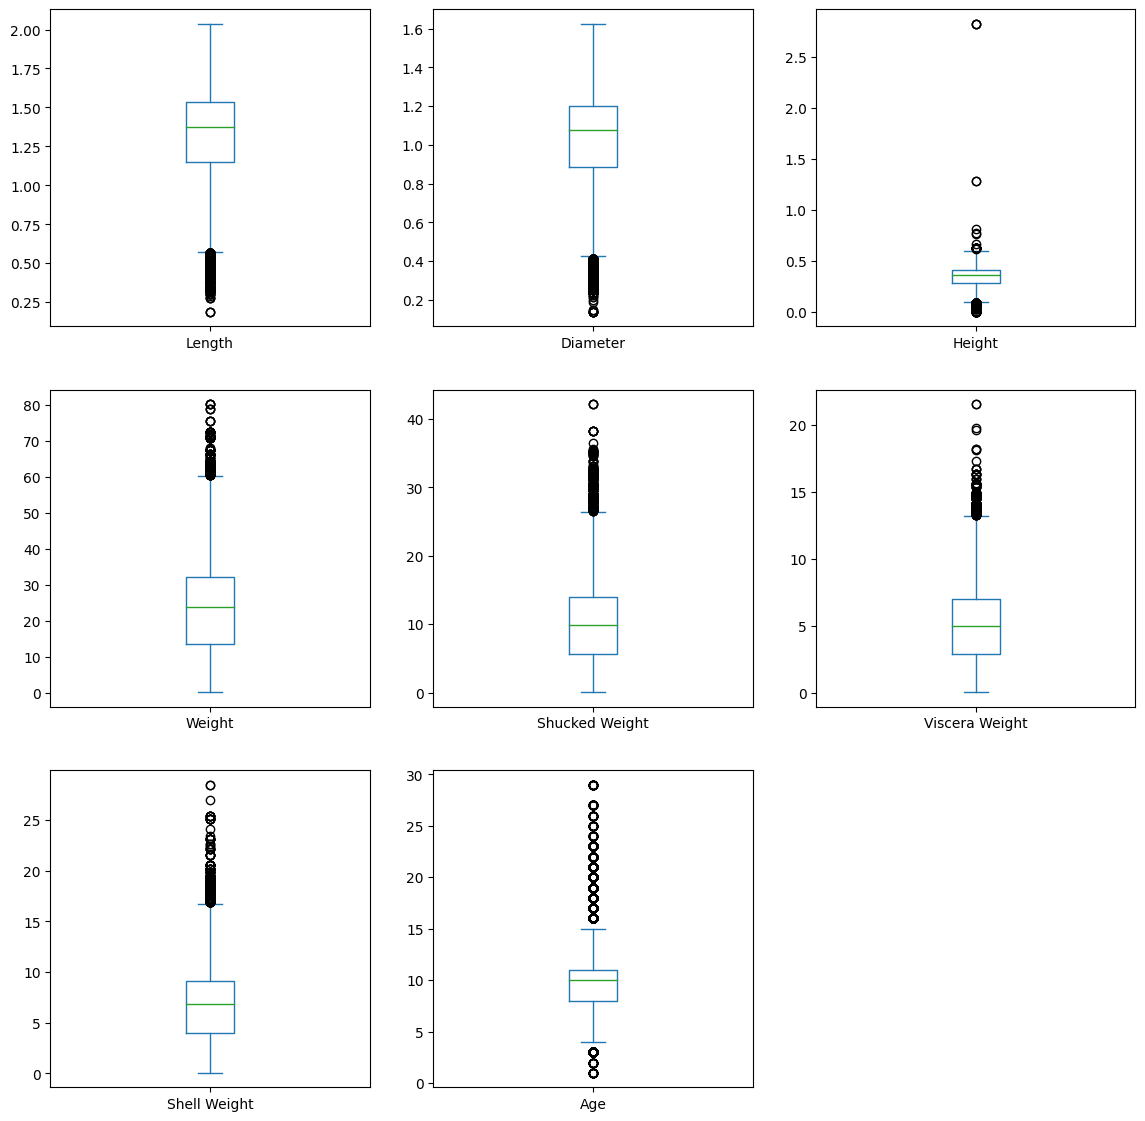

In [100]:
import matplotlib.pyplot as plt

# Individuals boxplot for each feature of the training data without id column
X_train.plot(kind='box', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (14, 14)
plt.show()

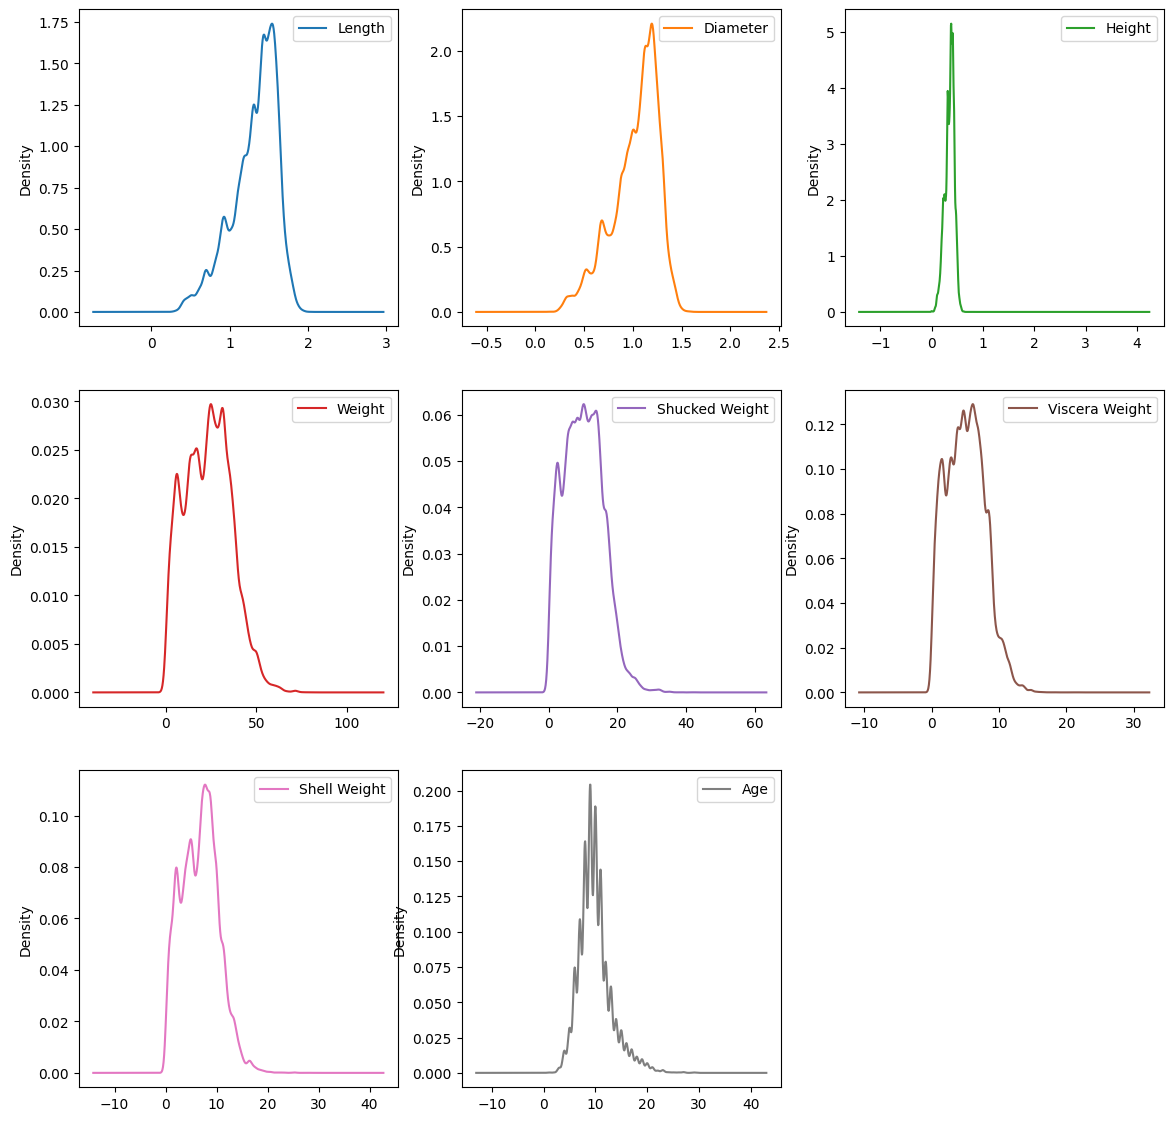

In [101]:
# Density function for each feature of the training data without id column
X_train.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, sharey=False)
plt.rcParams['figure.figsize'] = (14, 14)
plt.show()

In [102]:
# One Hot enconding of sex feature of X_train
X_train_OHE = pd.concat([X_train, pd.get_dummies(X_train['Sex'], prefix='Sex')], axis=1)
X_train_OHE.drop('Sex', axis=1, inplace=True)

In [103]:
X_test = pd.concat([X_test, pd.get_dummies(X_test['Sex'], prefix='Sex')], axis=1)
X_test.drop('Sex', axis=1, inplace=True)

In [104]:
# Bollean features to int
X_train_OHE['Sex_F'] = X_train_OHE['Sex_F'].astype(int)
X_train_OHE['Sex_M'] = X_train_OHE['Sex_M'].astype(int)
X_train_OHE['Sex_I'] = X_train_OHE['Sex_I'].astype(int)

# The same for the test data   
X_test['Sex_F'] = X_test['Sex_F'].astype(int)
X_test['Sex_M'] = X_test['Sex_M'].astype(int)
X_test['Sex_I'] = X_test['Sex_I'].astype(int)

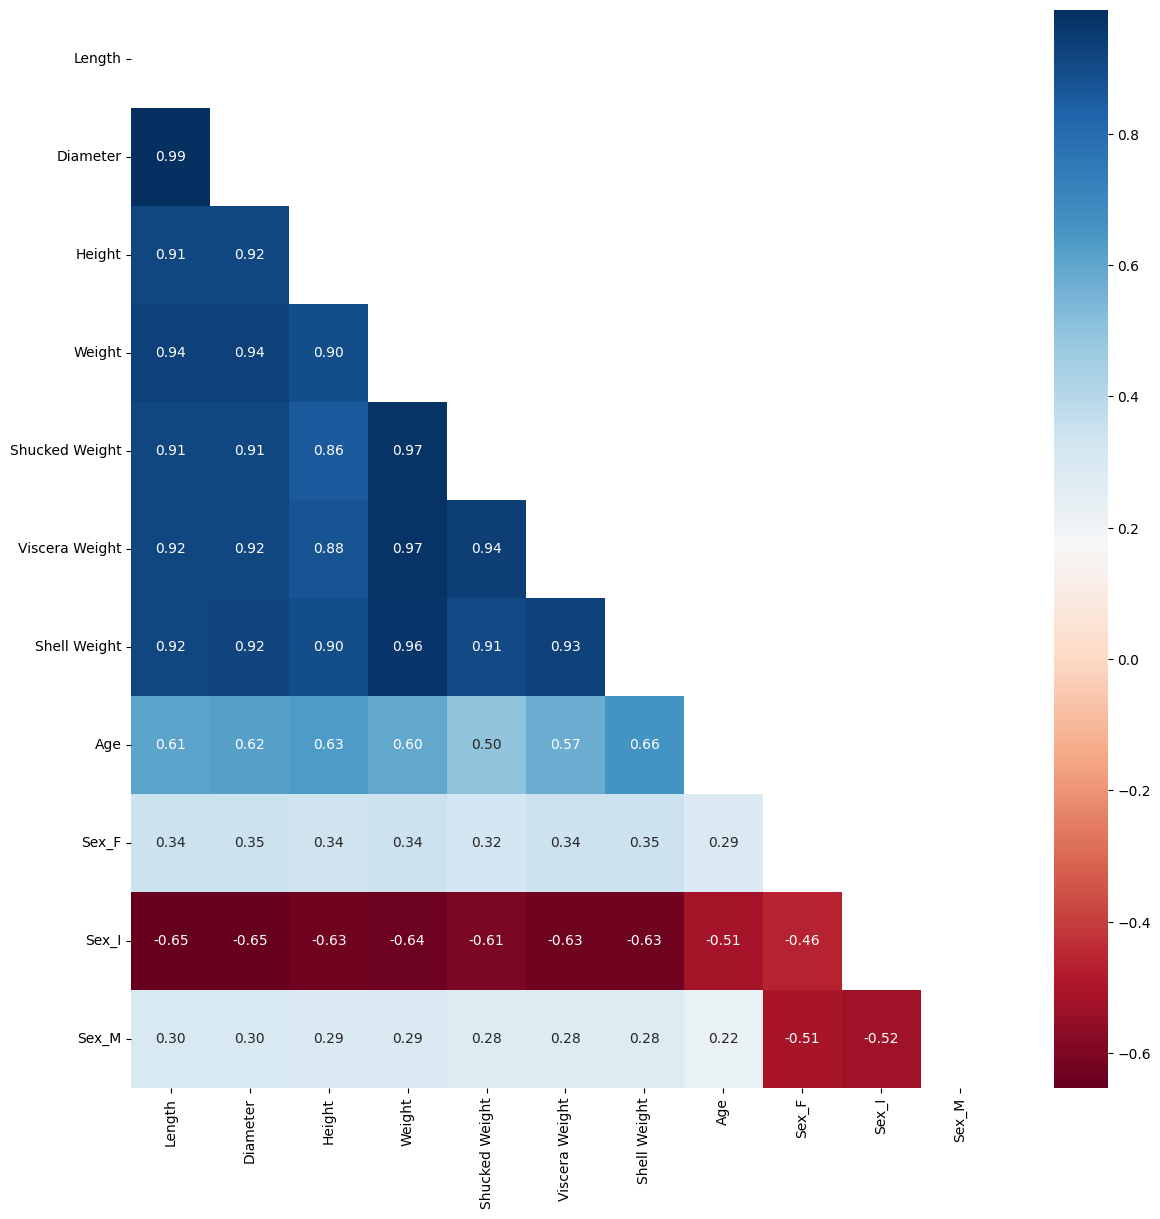

In [105]:
# Correlation matrix for the training data without id column with seaborn only inferior triangle
import seaborn as sns
import numpy as np

corr = X_train_OHE.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

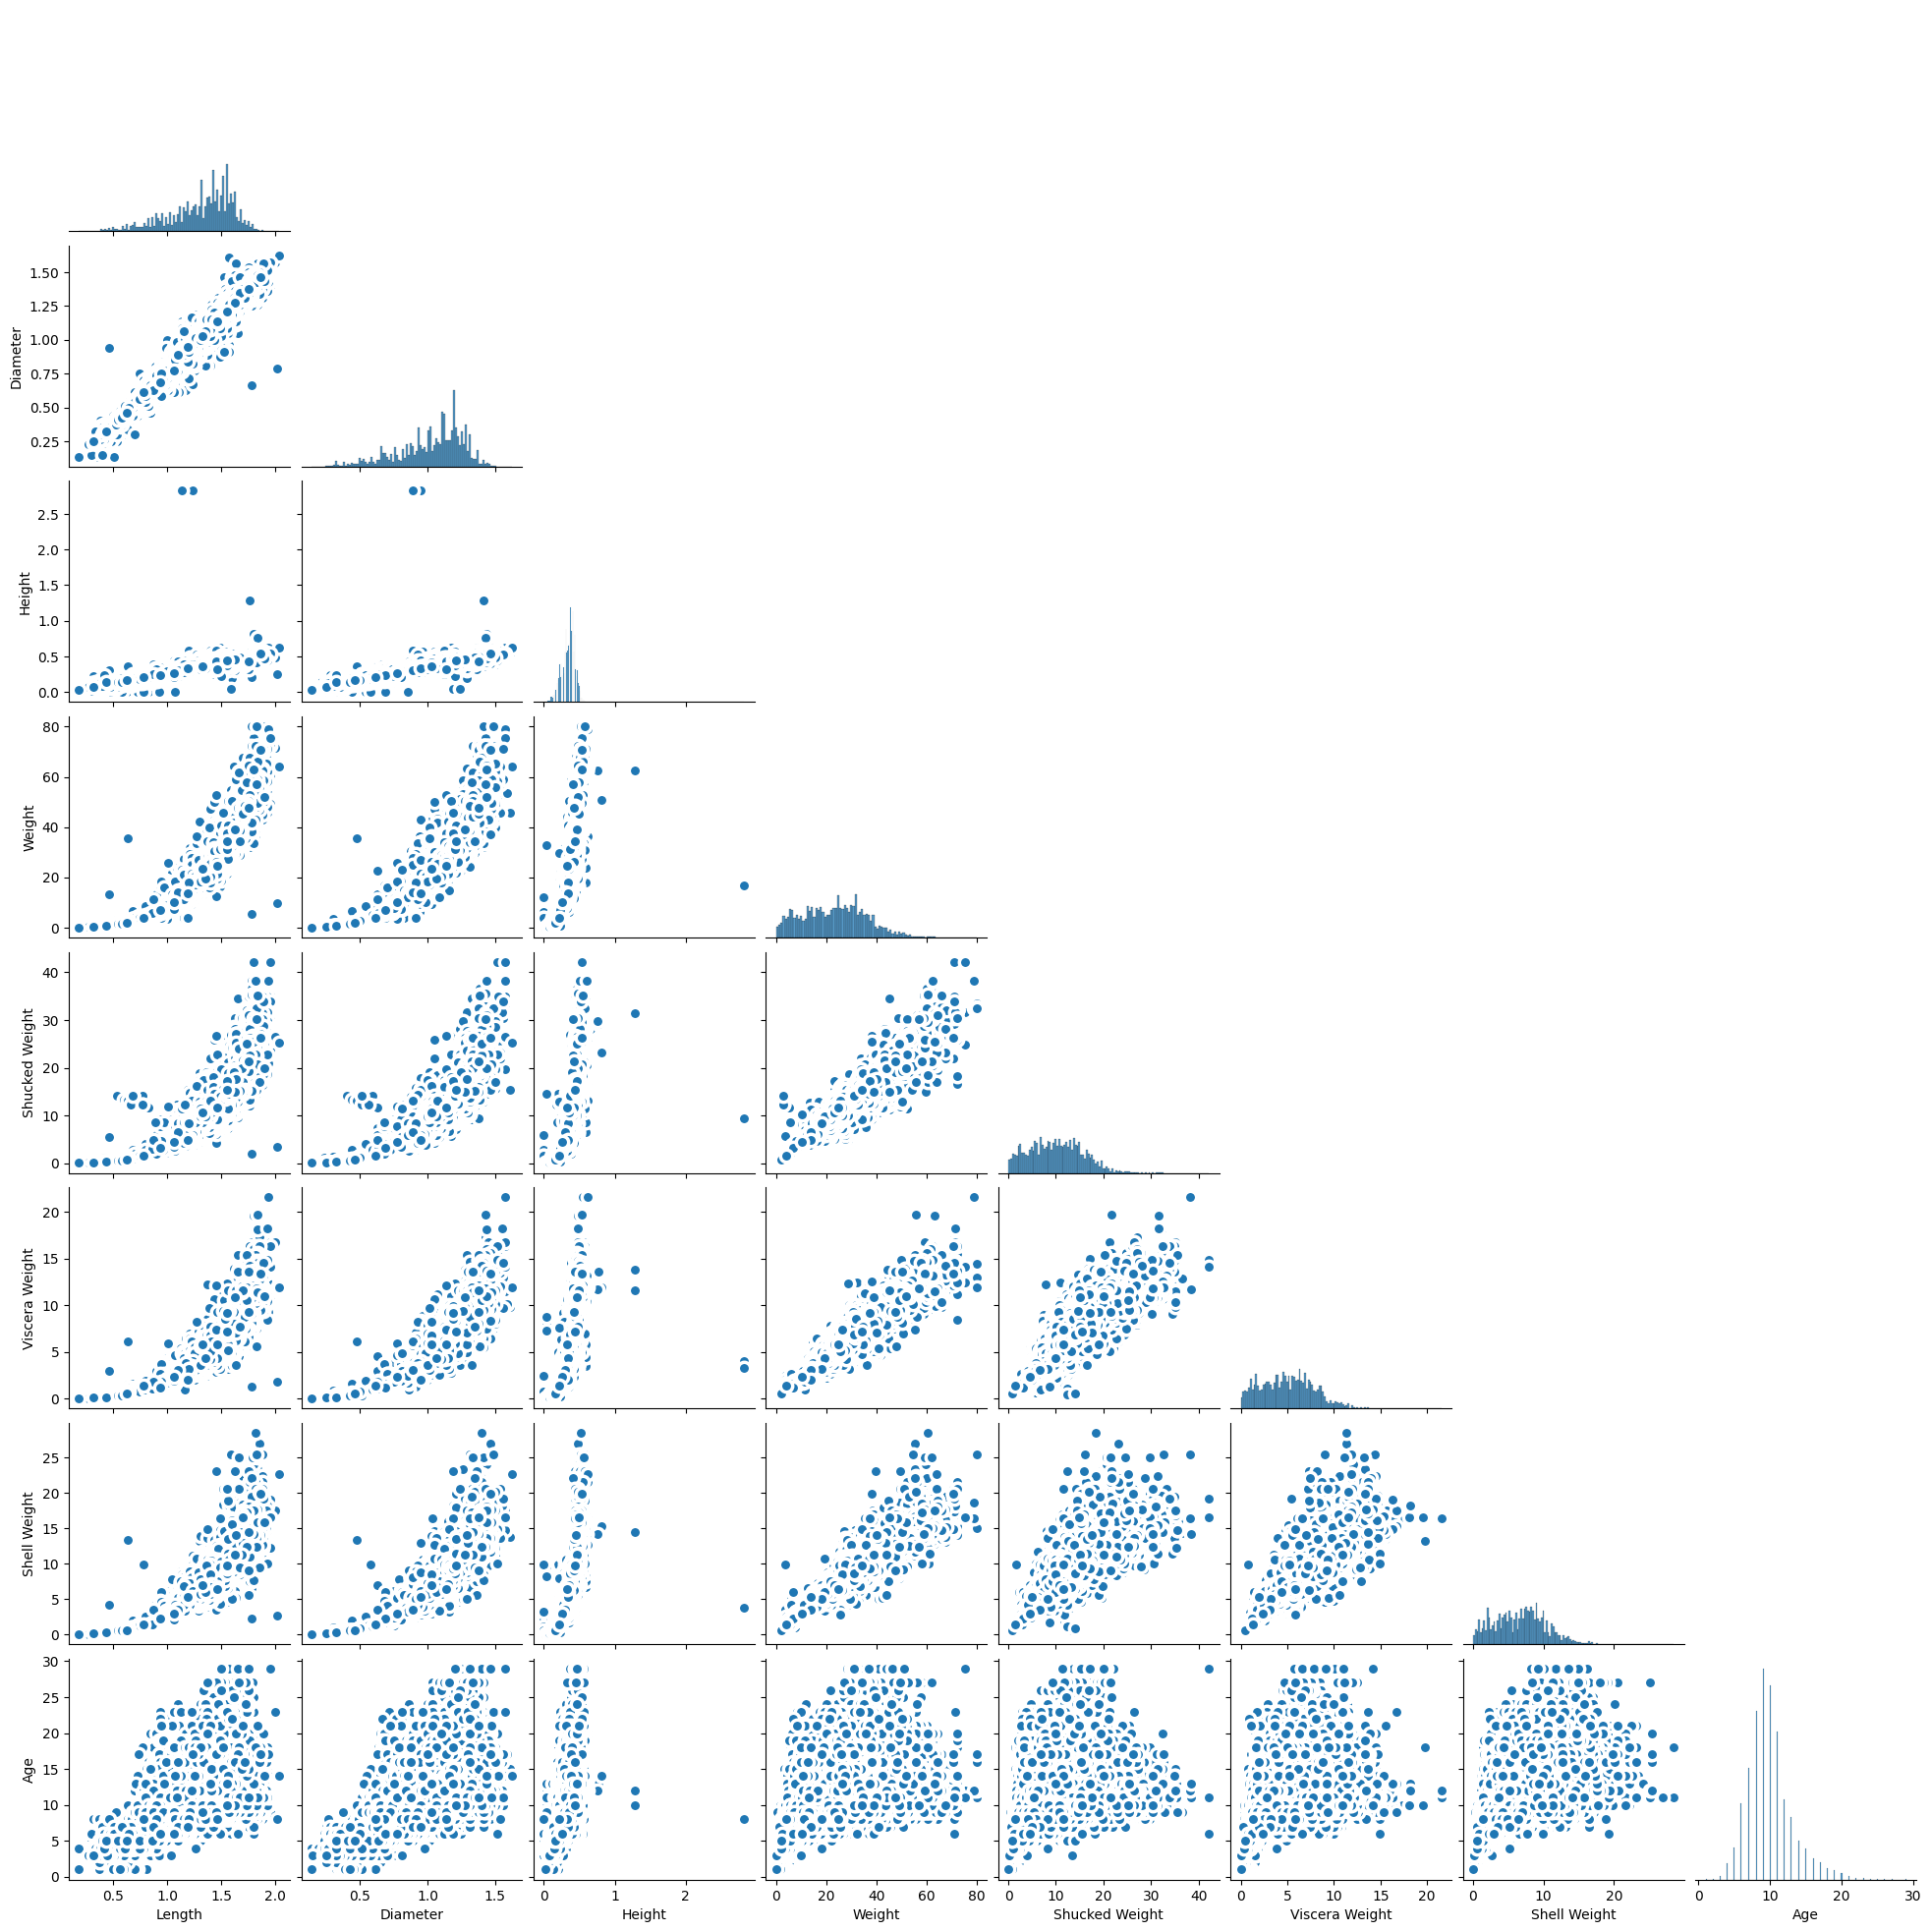

In [106]:
import seaborn as sns

# matrix of scatter and histograms for each feature of the training data without id column
sns.pairplot(data=X_train_OHE.iloc[:,:-3], corner=True, plot_kws={'s':80, 'edgecolor':"white", 'linewidth':2.5})
plt.show()

## 2.1. Outliers

We are going to get rid of outliers for modelling

In [107]:
#X_train_OHE.head()
#X_train_Out = pd.DataFrame(X_train_OHE)

In [108]:
# Loop over all feature to drop observations over and below 3 standard deviations

"""SD = 3 # Number of standard deviations to consider
for col in X_train_Out.columns[1:]:
    X_train_Out = X_train_Out[(X_train_Out[col] >= X_train_Out[col].mean() - SD * X_train_Out[col].std())]
    X_train_Out = X_train_Out[(X_train_Out[col] <= X_train_Out[col].mean() + SD * X_train_Out[col].std())]"""

'SD = 3 # Number of standard deviations to consider\nfor col in X_train_Out.columns[1:]:\n    X_train_Out = X_train_Out[(X_train_Out[col] >= X_train_Out[col].mean() - SD * X_train_Out[col].std())]\n    X_train_Out = X_train_Out[(X_train_Out[col] <= X_train_Out[col].mean() + SD * X_train_Out[col].std())]'

In [109]:
 # X_train_Out.head()

In [110]:
"""import seaborn as sns

# matrix of scatter and histograms for each feature of the training data without id column
sns.pairplot(data=X_train_Out.iloc[:,:-3], corner=True, plot_kws={'s':80, 'edgecolor':"white", 'linewidth':2.5})
plt.show()"""

'import seaborn as sns\n\n# matrix of scatter and histograms for each feature of the training data without id column\nsns.pairplot(data=X_train_Out.iloc[:,:-3], corner=True, plot_kws={\'s\':80, \'edgecolor\':"white", \'linewidth\':2.5})\nplt.show()'

Now scatter plots and histograms look much better.

In [111]:
"""X_train_Out.head()"""

'X_train_Out.head()'

## 2.2. Missing values

In [112]:
# Table with the number of missing values for each feature or nan values
X_train_OHE.isnull().sum()

Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

## Null values

In [113]:
# Chequea cantidad de valores 0 en la columna 'Height'
X_train_OHE['Height'].isin([0]).value_counts()

Height
False    77918
True        26
Name: count, dtype: int64

In [114]:
from sklearn.ensemble import RandomForestRegressor

# Loop over all features with 0 values to impute them with a random forest regressor
for feature in X_train_OHE.columns:
    if X_train_OHE[feature].isin([0]).any():
        train = X_train_OHE.dropna(subset=[feature]) # Drop nan values
        impute = X_train_OHE.loc[X_train_OHE[feature].isin([0])]    # Data to impute
 
        X_train_feature = train.drop(feature, axis=1) # Drop feature to impute
        y_train_feature = train[feature] # Feature to impute
        X_impute_feature = impute.drop(feature, axis=1)

        model = RandomForestRegressor(n_estimators=100, random_state=0)
        model.fit(X_train_feature, y_train_feature)

        imputed_values = model.predict(X_impute_feature)

        X_train_OHE.loc[X_train_OHE[feature].isin([0]), feature] = imputed_values


In [116]:
# Chequea cantidad de valores 0 en la columna 'Height'
X_train_OHE['Height'].isin([0]).value_counts()

Height
False    77944
Name: count, dtype: int64

# Feature engineering

Here are some characteristics and behaviors of crabs that might be relevant for feature engineering:

- Growth and Moulting: Crabs grow through a process called moulting, which is when they shed their previous shell and grow a new one. The frequency and timing of moulting can be related to the crab's age. For example, younger crabs moult more frequently than adult ones. If you have data on moult frequency or shell weight ratio (which might indicate when the last moult occurred), this could be useful.

- Sex and Reproduction: Growth patterns can vary between male and female crabs, especially in relation to reproduction. For example, females may stop growing when they start reproducing, whereas males may continue to grow for longer. Therefore, the sex of the crab could be a significant factor in predicting its age.

We are going to create the following type o features:

In [28]:
X_train_FE = pd.DataFrame(X_train_Out)

## Dimension ratios

In [84]:
X_train_FE['Relation_DL'] = X_train_FE['Diameter'] / X_train_FE['Length'] 
X_train_FE['Relation_HL'] = X_train_FE['Height'] / X_train_FE['Length'] 
X_train_FE['Relation_HD'] = X_train_FE['Height'] / X_train_FE['Diameter']

# The same for the test data
X_test['Relation_DL'] = X_test['Diameter'] / X_test['Length']
X_test['Relation_HL'] = X_test['Height'] / X_test['Length']
X_test['Relation_HD'] = X_test['Height'] / X_test['Diameter']

# Density

In [85]:
# importar el numero pi
import numpy as np

# We suppose the crab as a elllipsoid
X_train_FE['Volume'] = (4/3)*np.pi*(X_train_FE['Diameter'] * X_train_FE['Length'] * X_train_FE['Height'])/16
X_train_FE['Density'] = X_train_FE['Weight'] / X_train_FE['Volume']

X_test['Volume'] = (4/3)*np.pi*(X_test['Diameter'] * X_test['Length'] * X_test['Height'])/16
X_test['Density'] = X_test['Weight'] / X_test['Volume']


# Weight proportions

In [86]:
X_train_FE['Ratio_ShuWei'] = X_train_FE['Shucked Weight'] / X_train_FE['Weight']
X_train_FE['Ratio_VisWei'] = X_train_FE['Viscera Weight'] / X_train_FE['Weight']
X_train_FE['Ratio_SheWei'] = X_train_FE['Shell Weight'] / X_train_FE['Weight']

X_test['Ratio_ShuWei'] = X_test['Shucked Weight'] / X_test['Weight']
X_test['Ratio_VisWei'] = X_test['Viscera Weight'] / X_test['Weight']
X_test['Ratio_SheWei'] = X_test['Shell Weight'] / X_test['Weight']

In [87]:
X_train_FE.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0,1,0,0.770492,0.245902,0.319149,0.175917,164.698140,0.439335,0.229452,0.288160
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0,1,0,0.750000,0.250000,0.333333,0.065335,159.461114,0.434014,0.223129,0.326531
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,0,1,0.801802,0.270270,0.337079,0.151542,163.502324,0.457666,0.224256,0.268879
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,0,0,0.830882,0.294118,0.353982,0.314323,161.173615,0.401791,0.216970,0.296027
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0,1,0,0.810000,0.270000,0.333333,0.111827,208.259837,0.514303,0.193548,0.255630


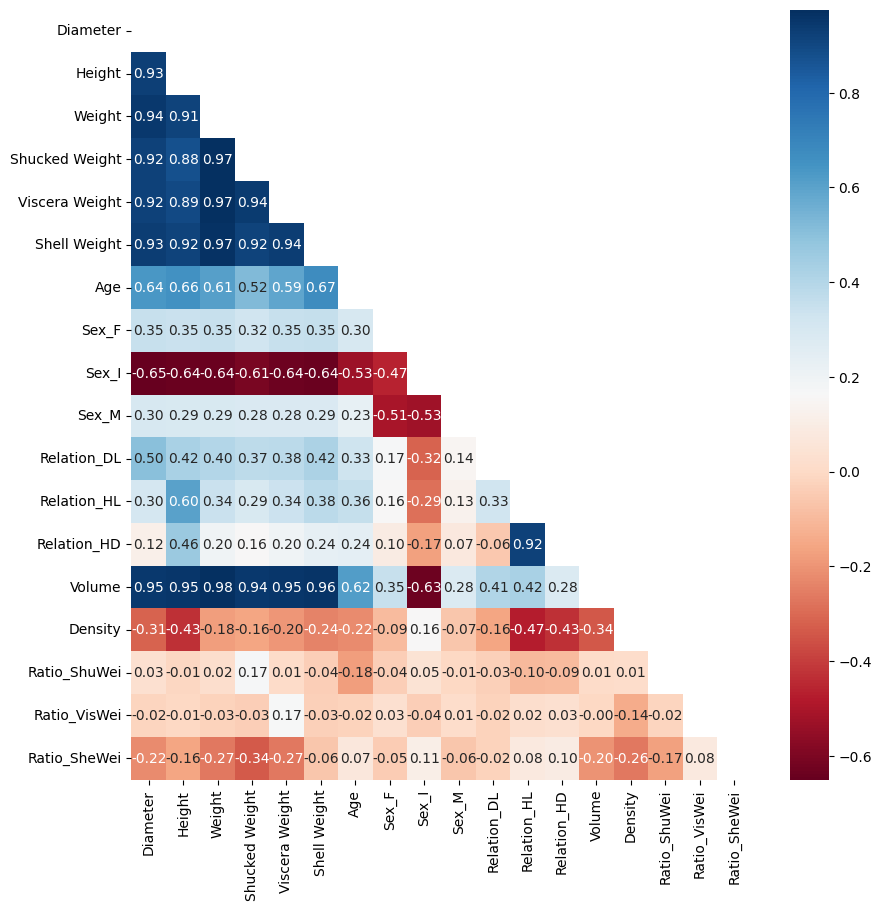

In [88]:
corr = X_train_FE.iloc[:,1:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, fmt='.2f')
plt.rcParams['figure.figsize'] = (20, 20)
plt.show()

In [89]:
X_train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [90]:
X_train_OHE.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0,1,0


In [91]:
X_train_Out.head()  

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0,1,0


In [92]:
X_train_FE.head()   

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0,1,0,0.770492,0.245902,0.319149,0.175917,164.698140,0.439335,0.229452,0.288160
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0,1,0,0.750000,0.250000,0.333333,0.065335,159.461114,0.434014,0.223129,0.326531
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,0,1,0.801802,0.270270,0.337079,0.151542,163.502324,0.457666,0.224256,0.268879
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,0,0,0.830882,0.294118,0.353982,0.314323,161.173615,0.401791,0.216970,0.296027
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0,1,0,0.810000,0.270000,0.333333,0.111827,208.259837,0.514303,0.193548,0.255630


# Modelling

In [93]:
X_train_Modelling = pd.DataFrame(X_train_FE)

In [94]:
y_train = X_train_Modelling['Age']

In [95]:
X_test = X_test.drop(['id'], axis=1)

In [31]:
X_train_Modelling.shape

(67429, 20)

In [96]:
X_train_Modelling_MC = X_train_Modelling.drop(['Age'], axis=1)

# Feature selection

## RFECV - Recursive Feature Elimination with Cross-Validation

In [91]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier



rf_classifier = RandomForestClassifier(
    n_estimators=250,
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features=4,
    random_state=42
)


# Asegúrate de que tienes tus datos en X e y
# X = tus datos característicos
# y = tu variable objetivo

# Define un objeto RFECV (Eliminación Recursiva de Características con Validación Cruzada)
rfecv = RFECV(estimator=rf_classifier, step=1, cv=StratifiedKFold(5),
              scoring='neg_mean_squared_error', n_jobs=-1)

# Ajusta el objeto RFECV a los datos
rfecv.fit(X_train_Modelling_MC, y_train)

# Imprime el número óptimo de características
print("Optimal number of features : %d" % rfecv.n_features_)

# Guarda las características seleccionadas en una lista
selected_features = [f for f, s in zip(X_train_Modelling_MC.columns, rfecv.support_) if s]

print("The selected features are: ", selected_features)

Optimal number of features : 4
The selected features are:  ['Shell Weight', 'Sex_I', 'Volume', 'Ratio_ShuWei']


## Genetic algorithm

In [44]:
X_train_FE.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,False,True,False,0.770492,0.245902,0.319149,0.175917,164.698140,0.439335,0.229452,0.288160
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,False,True,False,0.750000,0.250000,0.333333,0.065335,159.461114,0.434014,0.223129,0.326531
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,False,False,True,0.801802,0.270270,0.337079,0.151542,163.502324,0.457666,0.224256,0.268879
4,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,False,True,False,0.810000,0.270000,0.333333,0.111827,208.259837,0.514303,0.193548,0.255630
5,5,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,10,False,False,True,0.783333,0.275000,0.351064,0.190336,151.550759,0.464865,0.235381,0.275184


In [70]:
# Establece la semilla aleatoria para reproducibilidad
seed = 42

# Define el tamaño de la muestra (por ejemplo, 50% de los datos)
sample_size = 0.3

# Realiza el muestreo aleatorio
df_sample = X_train_FE.sample(frac=sample_size, random_state=seed)
y_train = df_sample['Age']


# Muestra los primeros registros de la muestra
print(df_sample.head())

          id  Length  Diameter  Height     Weight  Shucked Weight   
12195  12195  1.1875    0.9375  0.3125  16.386011        7.753588  \
15320  15320  1.6125    1.2500  0.4750  43.459784       18.909116   
5912    5912  1.3750    1.1000  0.3375  22.197658        8.632423   
6006    6006  1.4500    1.1500  0.3625  28.817267       12.856498   
9393    9393  1.3125    1.0000  0.3750  18.597272        8.193005   

       Viscera Weight  Shell Weight  Age  Sex_F  Sex_I  Sex_M  Relation_DL   
12195        3.061746      4.819415    8  False   True  False     0.789474  \
15320       11.495722     11.623295   10  False  False   True     0.775194   
5912         4.450871      7.512618   11  False  False   True     0.800000   
6006         6.265239      7.512618   15   True  False  False     0.793103   
9393         4.394172      5.811648   10  False  False   True     0.761905   

       Relation_HL  Relation_HD    Volume     Density  Ratio_ShuWei   
12195     0.263158     0.333333  0.091080  17

In [71]:
df_sample = df_sample.drop(['id', 'Age'], axis=1)

In [72]:
df_sample.shape

(20229, 18)

In [73]:
y_train.shape


(20229,)

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from deap import creator, base, tools, algorithms
import random

# Crear el objeto de clasificación. Esto debería ser un objeto que implementa el método `fit`.
clf = RandomForestClassifier()

# Crear los objetos necesarios para DEAP.
creator.create("FeatureSelect", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FeatureSelect)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(df_sample.columns))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    mask = [bool(val) for val in individual]
    return cross_val_score(clf, df_sample.loc[:, mask], y_train, cv=5).mean(),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

population = toolbox.population(n=50)

NGEN=40
for gen in range(NGEN):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))
top10 = tools.selBest(population, k=10)

c:\Users\Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FeatureSelect' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


KeyboardInterrupt: 

# Model Comparison

In [199]:
# Subsetting of X_train_Modelling with 30% of its observations

# Standardization of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



X_train_Modelling_MC = pd.DataFrame(X_train_Modelling)
X_train_Modelling = scaler.fit_transform(X_train_Modelling)

y_train_MC =X_train_Modelling_MC['Age']

In [85]:
# Subsetting of X_train_Modelling with 30% of its observations
"""X_train_Modelling_MC = X_train_Modelling.sample(frac=0.4, replace=False, random_state=1)
y_train_MC =X_train_Modelling_MC['Age']"""

"X_train_Modelling_MC = X_train_Modelling.sample(frac=0.4, replace=False, random_state=1)\ny_train_MC =X_train_Modelling_MC['Age']"

In [202]:
X_train_Modelling_MC.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,0,1,0,0.770492,0.245902,0.319149,0.175917,164.698140,0.439335,0.229452,0.288160
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0,1,0,0.750000,0.250000,0.333333,0.065335,159.461114,0.434014,0.223129,0.326531
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,0,0,1,0.801802,0.270270,0.337079,0.151542,163.502324,0.457666,0.224256,0.268879
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0,1,0,0.810000,0.270000,0.333333,0.111827,208.259837,0.514303,0.193548,0.255630
5,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,0,0,1,0.783333,0.275000,0.351064,0.190336,151.550759,0.464865,0.235381,0.275184


In [148]:
X_train_Modelling_MC = X_train_Modelling_MC.drop(['Age', 'id'], axis=1)

KeyError: "['Age', 'id'] not found in axis"

In [203]:
# Comparison of the different models with cross validation
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

"""    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Neural Network", MLPRegressor(max_iter=1000)),
    ("SVR", SVR()),
    ("Knn", KNeighborsRegressor()),
    ("XGB", XGBRegressor(eval_metric='mae')),"""

models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Knn", KNeighborsRegressor()),
    ("XGB", XGBRegressor(eval_metric='mae')),
    ("LGBM", LGBMRegressor())
]

cv = KFold(n_splits=5, shuffle=True, random_state=1)  # KFold cross-validator

model_scores = {}

for name, model in models:
    scores = -1 * cross_val_score(model, X_train_Modelling_MC, y_train_MC, cv = cv, scoring='neg_mean_absolute_error')
    model_scores[name] = scores

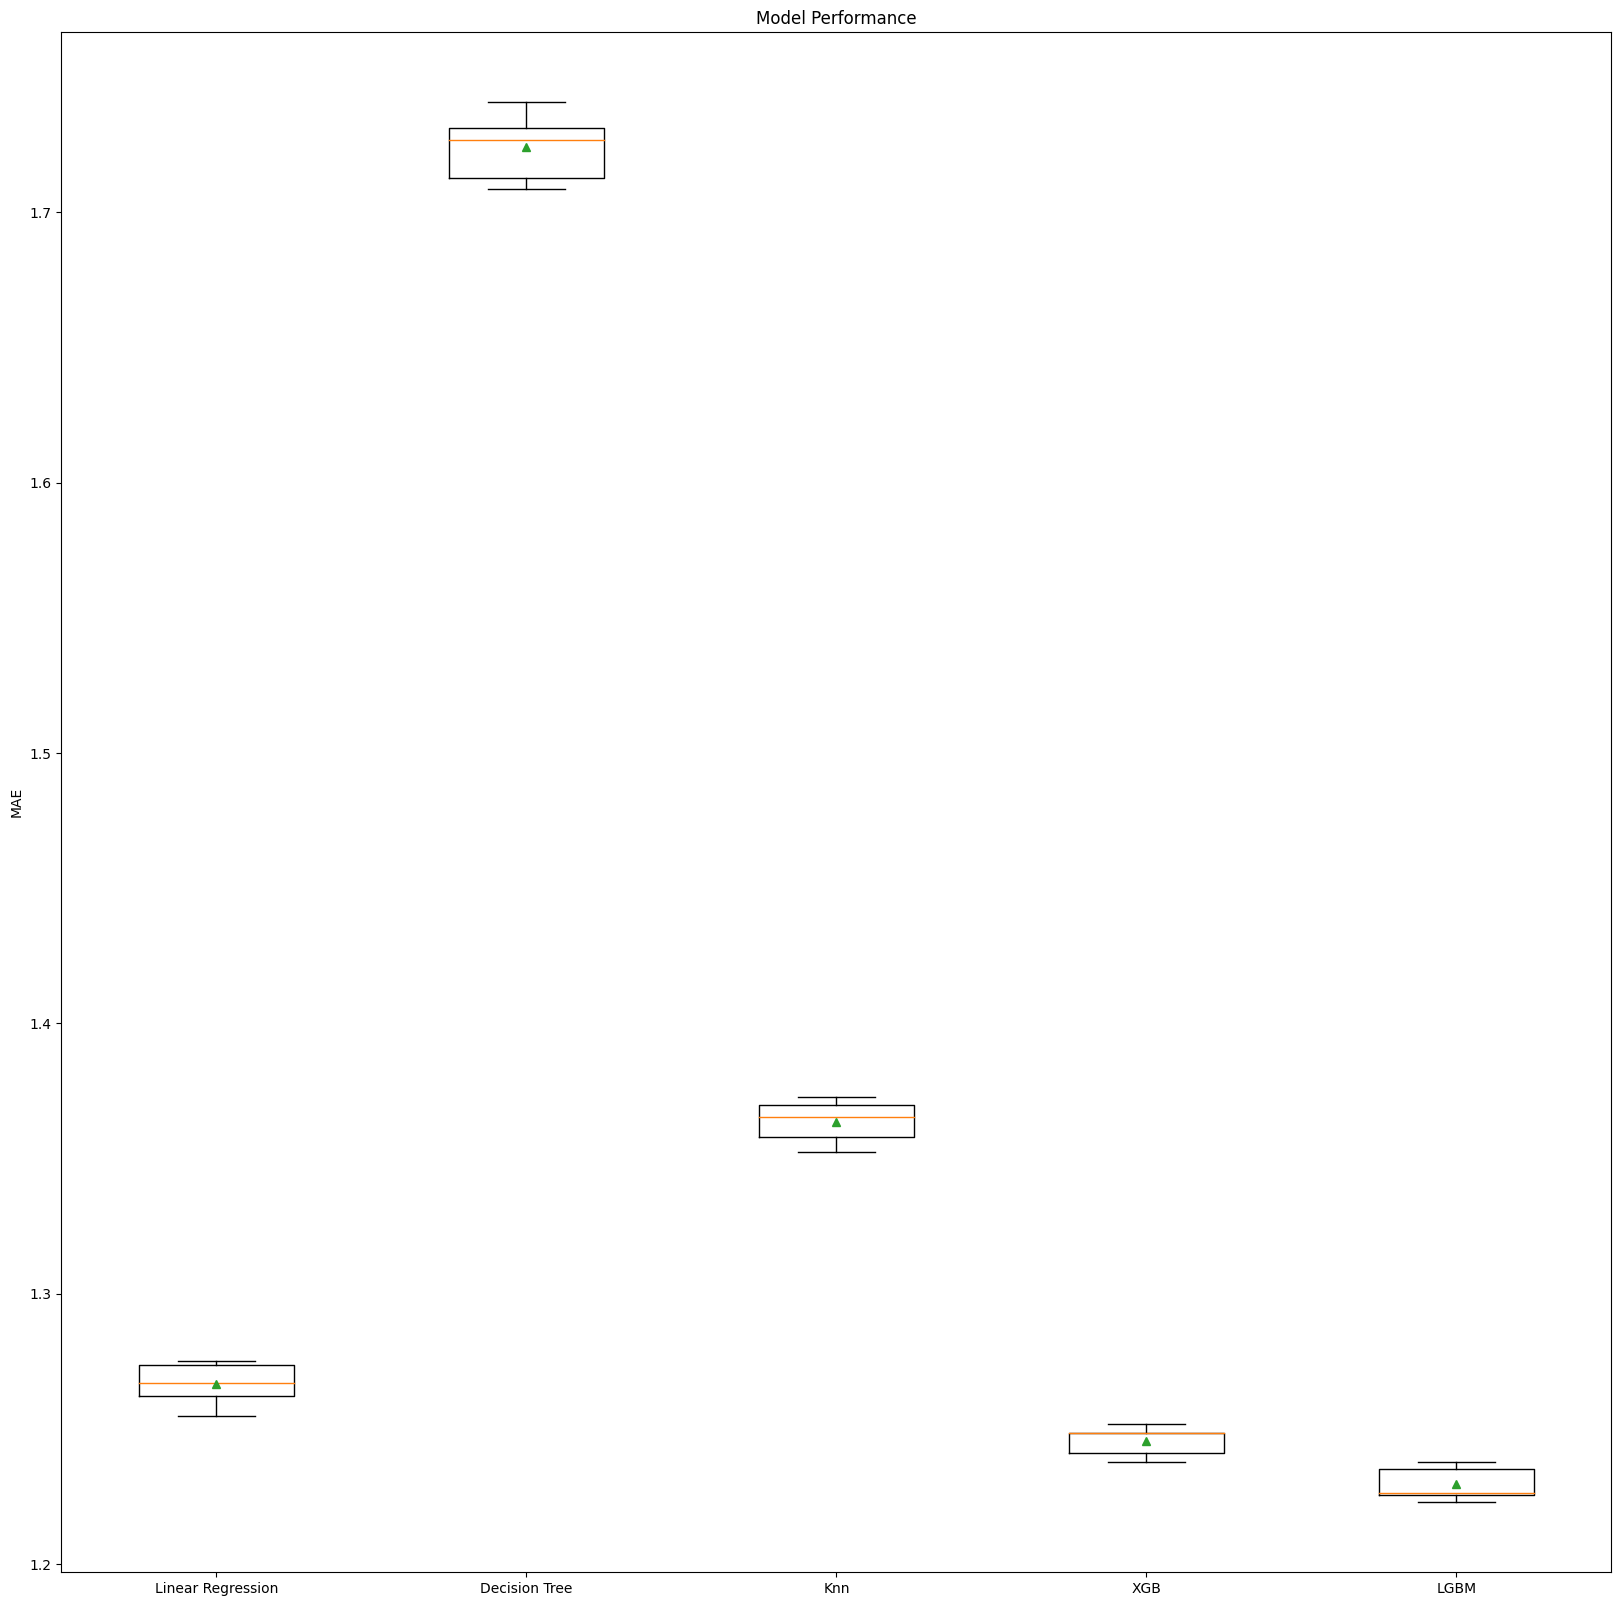

In [204]:
plt.boxplot(model_scores.values(), labels=model_scores.keys(), showmeans=True)
plt.ylabel("MAE")
plt.title("Model Performance")
plt.show()

In [208]:
# Standardization of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Modelling_SS = scaler.fit_transform(X_train_Modelling_MC)

In [209]:
X_train_Modelling_SS = pd.DataFrame(X_train_Modelling_SS, columns=X_train_Modelling_MC.columns)

In [211]:
X_train_Modelling_SS.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
count,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04,6.742900e+04
mean,-4.926348e-16,-6.985930e-16,-3.943186e-16,-2.392045e-16,-1.416259e-16,-9.194094e-17,-2.790368e-16,1.095915e-17,1.865163e-17,1.596453e-17,-2.042195e-16,1.082637e-15,4.529079e-16,-1.991615e-17,-1.096969e-16,-3.961100e-16,-2.034819e-16,1.863055e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-2.920923e+00,-2.577698e+00,-2.502486e+00,-1.945822e+00,-1.849249e+00,-1.897276e+00,-1.995884e+00,-6.705359e-01,-6.852165e-01,-7.668991e-01,-1.464082e+01,-5.619334e+00,-4.805179e+00,-1.799104e+00,-5.843001e+00,-3.295102e+00,-5.077153e+00,-4.495857e+00
25%,-6.076698e-01,-6.361690e-01,-6.158629e-01,-8.159144e-01,-8.079281e-01,-8.169893e-01,-7.880260e-01,-6.705359e-01,-6.852165e-01,-7.668991e-01,-5.860497e-01,-6.524709e-01,-6.623575e-01,-8.019476e-01,-6.593869e-01,-4.317477e-01,-6.217411e-01,-6.414909e-01
50%,1.969401e-01,2.132501e-01,1.702301e-01,4.791021e-02,-2.271572e-02,-2.515595e-02,6.829089e-02,-6.705359e-01,-6.852165e-01,-7.668991e-01,3.538299e-02,-4.354313e-02,-3.372289e-02,1.925019e-02,-8.834060e-02,3.834213e-03,-3.008715e-02,-9.295844e-02
75%,8.003976e-01,7.593052e-01,7.991045e-01,7.692353e-01,7.737541e-01,7.666774e-01,7.443305e-01,1.491344e+00,1.459393e+00,1.303953e+00,5.919694e-01,6.059274e-01,5.748652e-01,7.596555e-01,5.503604e-01,4.148383e-01,5.927692e-01,5.553143e-01
max,2.459906e+00,2.276125e+00,2.685728e+00,2.765490e+00,2.650946e+00,2.616174e+00,2.641749e+00,1.491344e+00,1.459393e+00,1.303953e+00,8.158154e+00,7.570066e+00,8.471212e+00,3.511710e+00,1.084507e+01,5.875634e+01,1.616056e+01,6.154887e+01


# Models training

## Random Forest

In [98]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

# Dividir los datos de entrenamiento en un conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_Modelling_MC, y_train, test_size=0.2, random_state=42)

space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 25),
    'max_depth': hp.quniform('max_depth', 5, 30, 1),
    'max_features': hp.choice('max_features', [1.0, 'sqrt', 'log2']), # Reemplazado 'auto' por 1.0
    'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
    'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1)
}

# Función objetivo para Hyperopt
def objective(params):
    # Convierte los parámetros numéricos a enteros
    params = {'n_estimators': int(params['n_estimators']),
              'max_depth': int(params['max_depth']),
              'max_features': params['max_features'],
              'min_samples_split': int(params['min_samples_split']),
              'min_samples_leaf': int(params['min_samples_leaf'])}

    # Entrenar y predecir con el modelo RandomForestRegressor
    model = RandomForestRegressor(**params, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    # Calcular la métrica MAE
    mae = mean_absolute_error(y_val, y_pred)

    return {'loss': mae, 'status': STATUS_OK}

# Ejecutar la optimización de hiperparámetros
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20,
            trials=trials)

print("Mejores hiperparámetros encontrados: ", best)


  5%|▌         | 1/20 [00:30<09:48, 30.95s/trial, best loss: 1.2308141931859744]

c:\Users\Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 10%|█         | 2/20 [01:26<13:36, 45.37s/trial, best loss: 1.2305472848643382]

c:\Users\Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 15%|█▌        | 3/20 [07:14<51:57, 183.40s/trial, best loss: 1.2305472848643382]

c:\Users\Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



 80%|████████  | 16/20 [15:52<01:53, 28.28s/trial, best loss: 1.2305472848643382]

c:\Users\Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(



100%|██████████| 20/20 [22:59<00:00, 68.96s/trial, best loss: 1.2305472848643382] 
Mejores hiperparámetros encontrados:  {'max_depth': 9.0, 'max_features': 0, 'min_samples_leaf': 8.0, 'min_samples_split': 9.0, 'n_estimators': 125.0}


In [111]:
max_features_options = [1.0, 'sqrt', 'log2']  # Las opciones originales para 'max_features'

model_RF = RandomForestRegressor(
    n_estimators=int(best['n_estimators']),
    max_depth=int(best['max_depth']),
    max_features=max_features_options[best['max_features']],  # Convertir índice a valor
    min_samples_split=int(best['min_samples_split']),
    min_samples_leaf=int(best['min_samples_leaf']),
    random_state=42
)

model_RF.fit(X_train_Modelling_MC, y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=8, min_samples_split=9,
                      n_estimators=125, random_state=42)

## Lasso

In [212]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np

# train test split
X_train, X_val, y_train, y_val = train_test_split(X_train_Modelling_SS, y_train_MC, test_size=0.2, random_state=1)

train_scores = []
val_scores = []

alphas = np.linspace(0.004, 0.8, num=100)


for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    train_score = mean_absolute_error(y_train, model.predict(X_train))
    val_score = mean_absolute_error(y_val, model.predict(X_val))
    
    train_scores.append(train_score)
    val_scores.append(val_score)

# Calculate the difference between training and validation scores
score_diff = [train_scores[i] - val_scores[i] for i in range(len(train_scores))]

# Perform cross-validation
cv_scores = []
for alpha in alphas:
    model = Lasso(alpha=alpha)
    cv_scores.append(-np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')))


c:\Users\Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.168e+01, tolerance: 3.429e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.705e+01, tolerance: 2.750e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale 

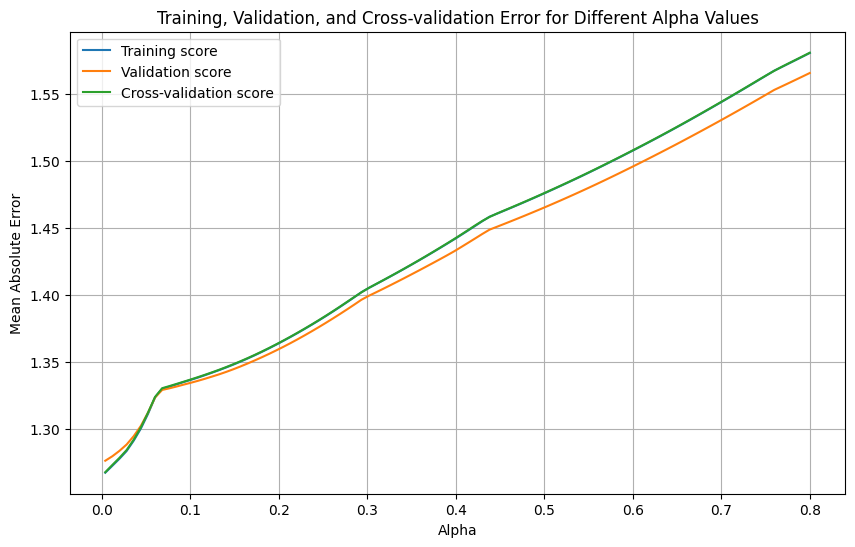

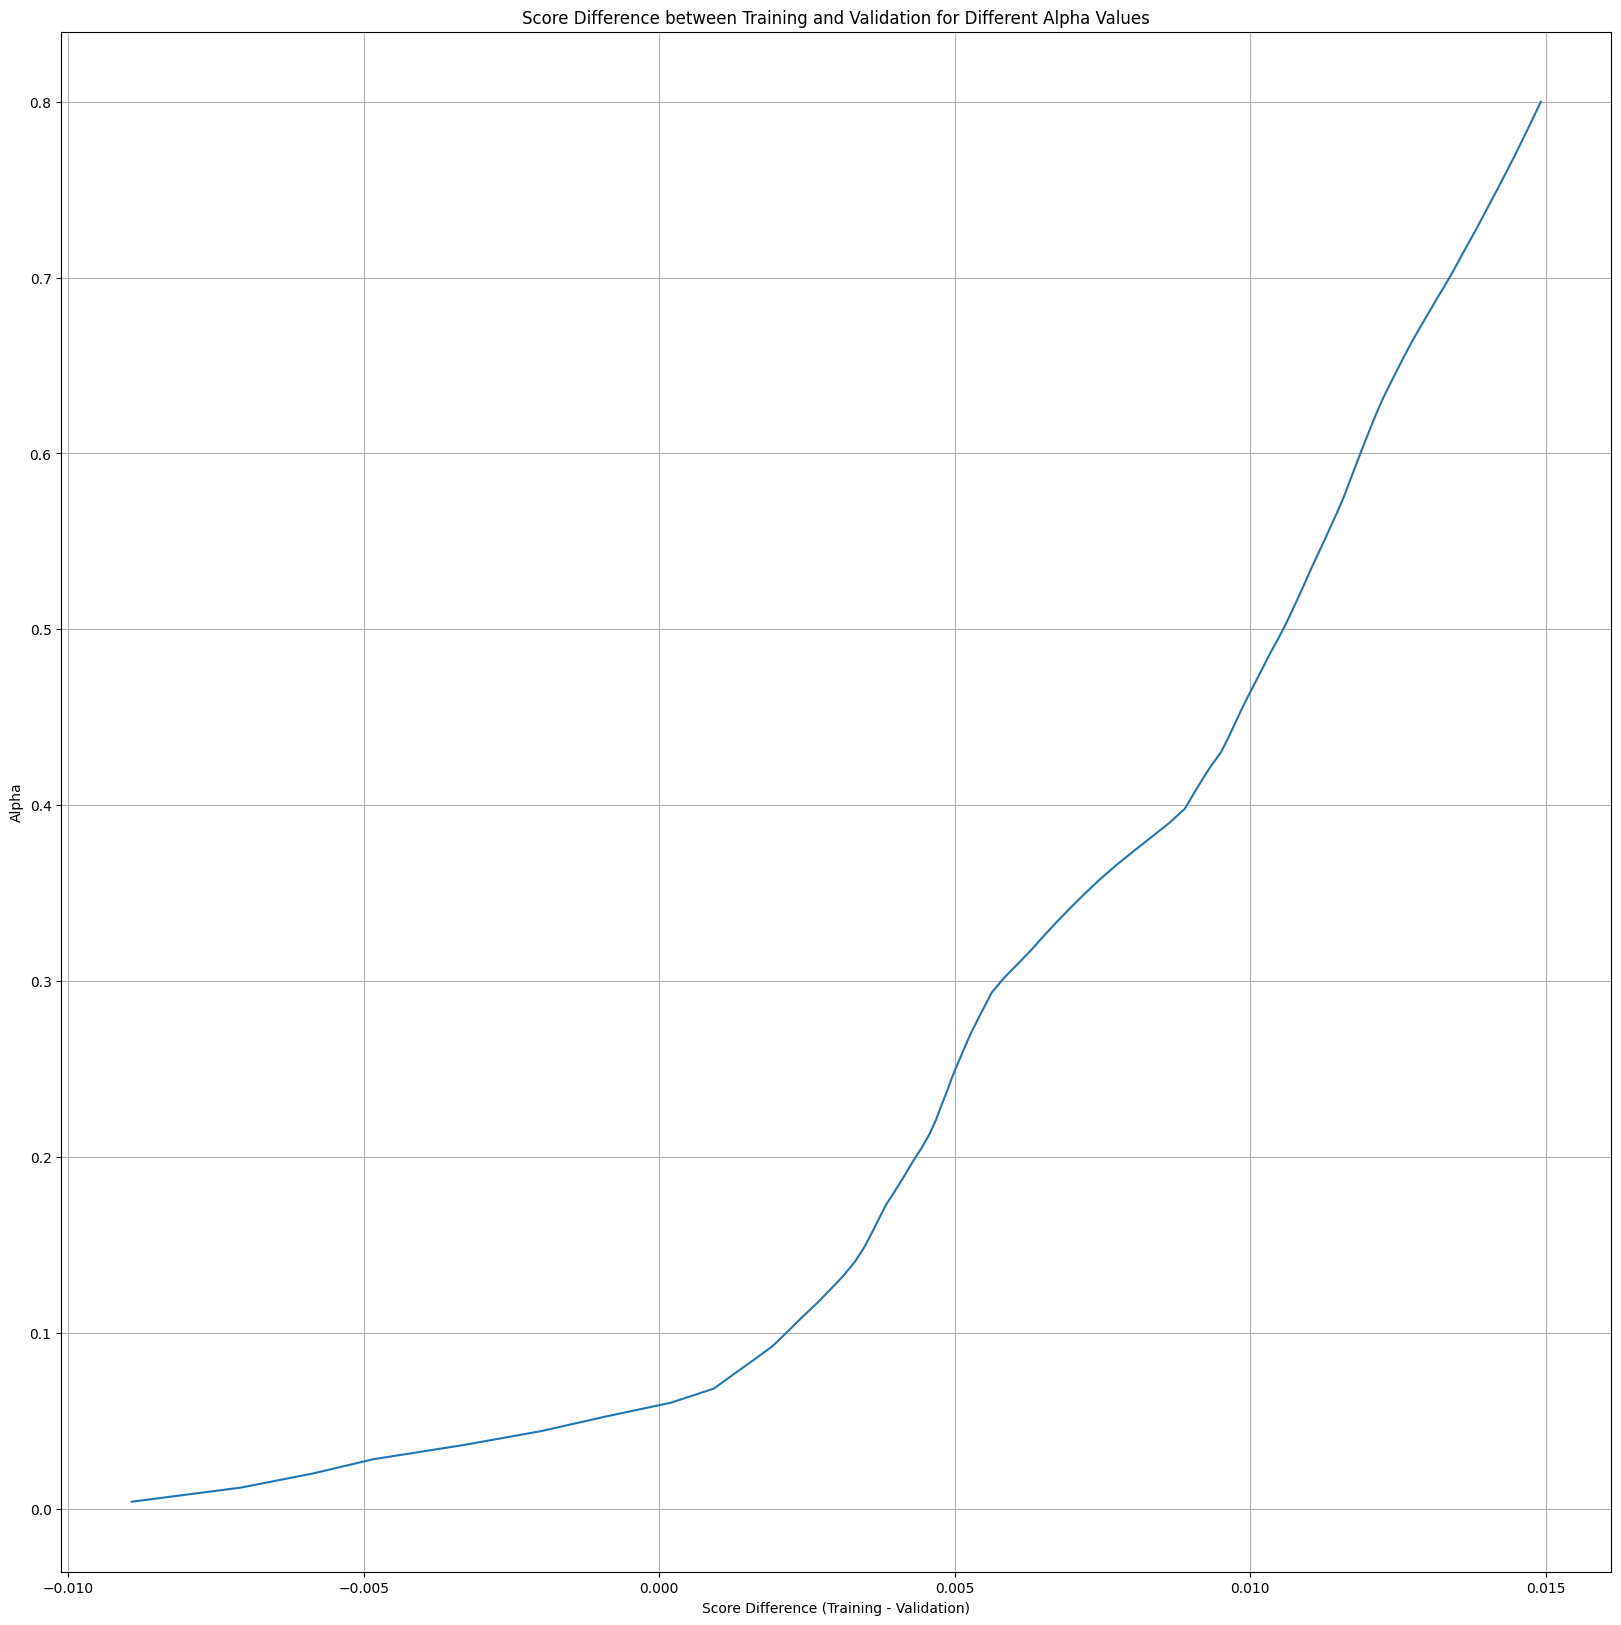

In [213]:

# Plot the scores
plt.figure(figsize=(10,6))
plt.plot(alphas, train_scores, label='Training score')
plt.plot(alphas, val_scores, label='Validation score')
plt.plot(alphas, cv_scores, label='Cross-validation score')
plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.title('Training, Validation, and Cross-validation Error for Different Alpha Values')
plt.legend()
plt.grid()
plt.show()

# Plot the score difference
plt.plot(score_diff, alphas)
plt.ylabel('Alpha')
plt.xlabel('Score Difference (Training - Validation)')
plt.title('Score Difference between Training and Validation for Different Alpha Values')
plt.grid()
plt.show()

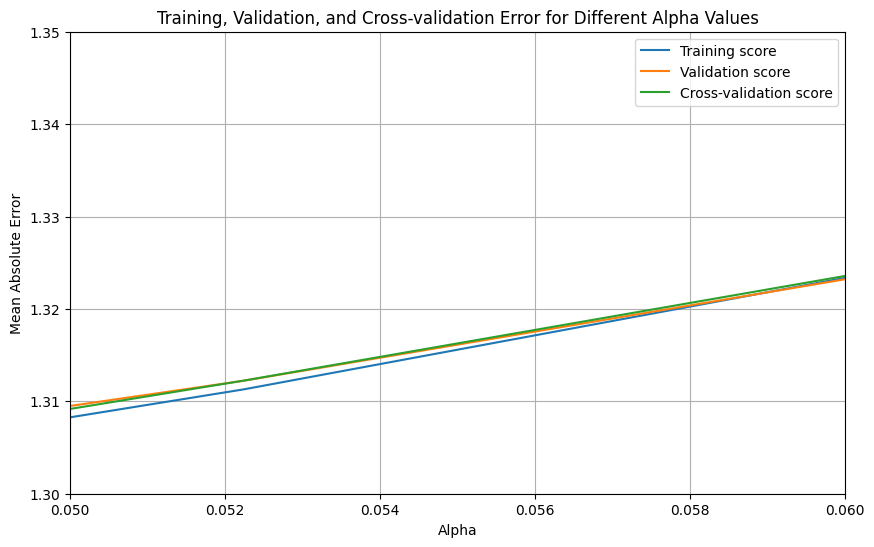

In [214]:
# Plot the scores
plt.figure(figsize=(10,6))
plt.plot(alphas, train_scores, label='Training score')
plt.plot(alphas, val_scores, label='Validation score')
plt.plot(alphas, cv_scores, label='Cross-validation score')
plt.xlim(0.05, 0.06)
plt.ylim(1.3, 1.35)



plt.xlabel('Alpha')
plt.ylabel('Mean Absolute Error')
plt.title('Training, Validation, and Cross-validation Error for Different Alpha Values')
plt.legend()
plt.grid()
plt.show()

In [215]:
from sklearn.linear_model import Lasso

model_Lasso = Lasso(alpha=0.055)
model_Lasso.fit(X_train_Modelling_SS, y_train_MC)


Lasso(alpha=0.055)

## KNN

In [216]:
from sklearn.model_selection import train_test_split
from hyperopt import fmin, tpe, hp, Trials, space_eval, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, make_scorer

# Hyperparameter search space
space ={
    'n_neighbors': hp.quniform('n_neighbors', 2, 25, 1),
    'weights': hp.choice('weights', ['uniform']),
    'p': hp.choice('p', [1, 2]),
}


# First, split your data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_Modelling_SS, y_train_MC, test_size=0.2, random_state=42)

def objective(params):
    # Make sure to convert n_neighbors to an integer because hp.quniform returns a float
    params['n_neighbors'] = int(params['n_neighbors'])
    
    # Instantiate the model with the given parameters
    model_Knn_0 = KNeighborsRegressor(**params)

    # Train the model on the training set
    model_Knn_0.fit(X_train, y_train)
    
    # Calculate the performance on the training and validation sets
    train_score = mean_absolute_error(y_train, model_Knn_0.predict(X_train))
    val_score = mean_absolute_error(y_val, model_Knn_0.predict(X_val))
    
    # Calculate the loss as the validation score plus a penalty for overfitting
    loss = val_score + np.square(train_score - val_score)
    
    return {'loss': loss, 'status': STATUS_OK}


# Run the algorithm
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

# Get the best hyperparameters
best_params = space_eval(space, best)

print("Best: ", best_params)

100%|██████████| 50/50 [12:58<00:00, 15.56s/trial, best loss: 1.2665861908067202]
Best:  {'n_neighbors': 25.0, 'p': 1, 'weights': 'uniform'}


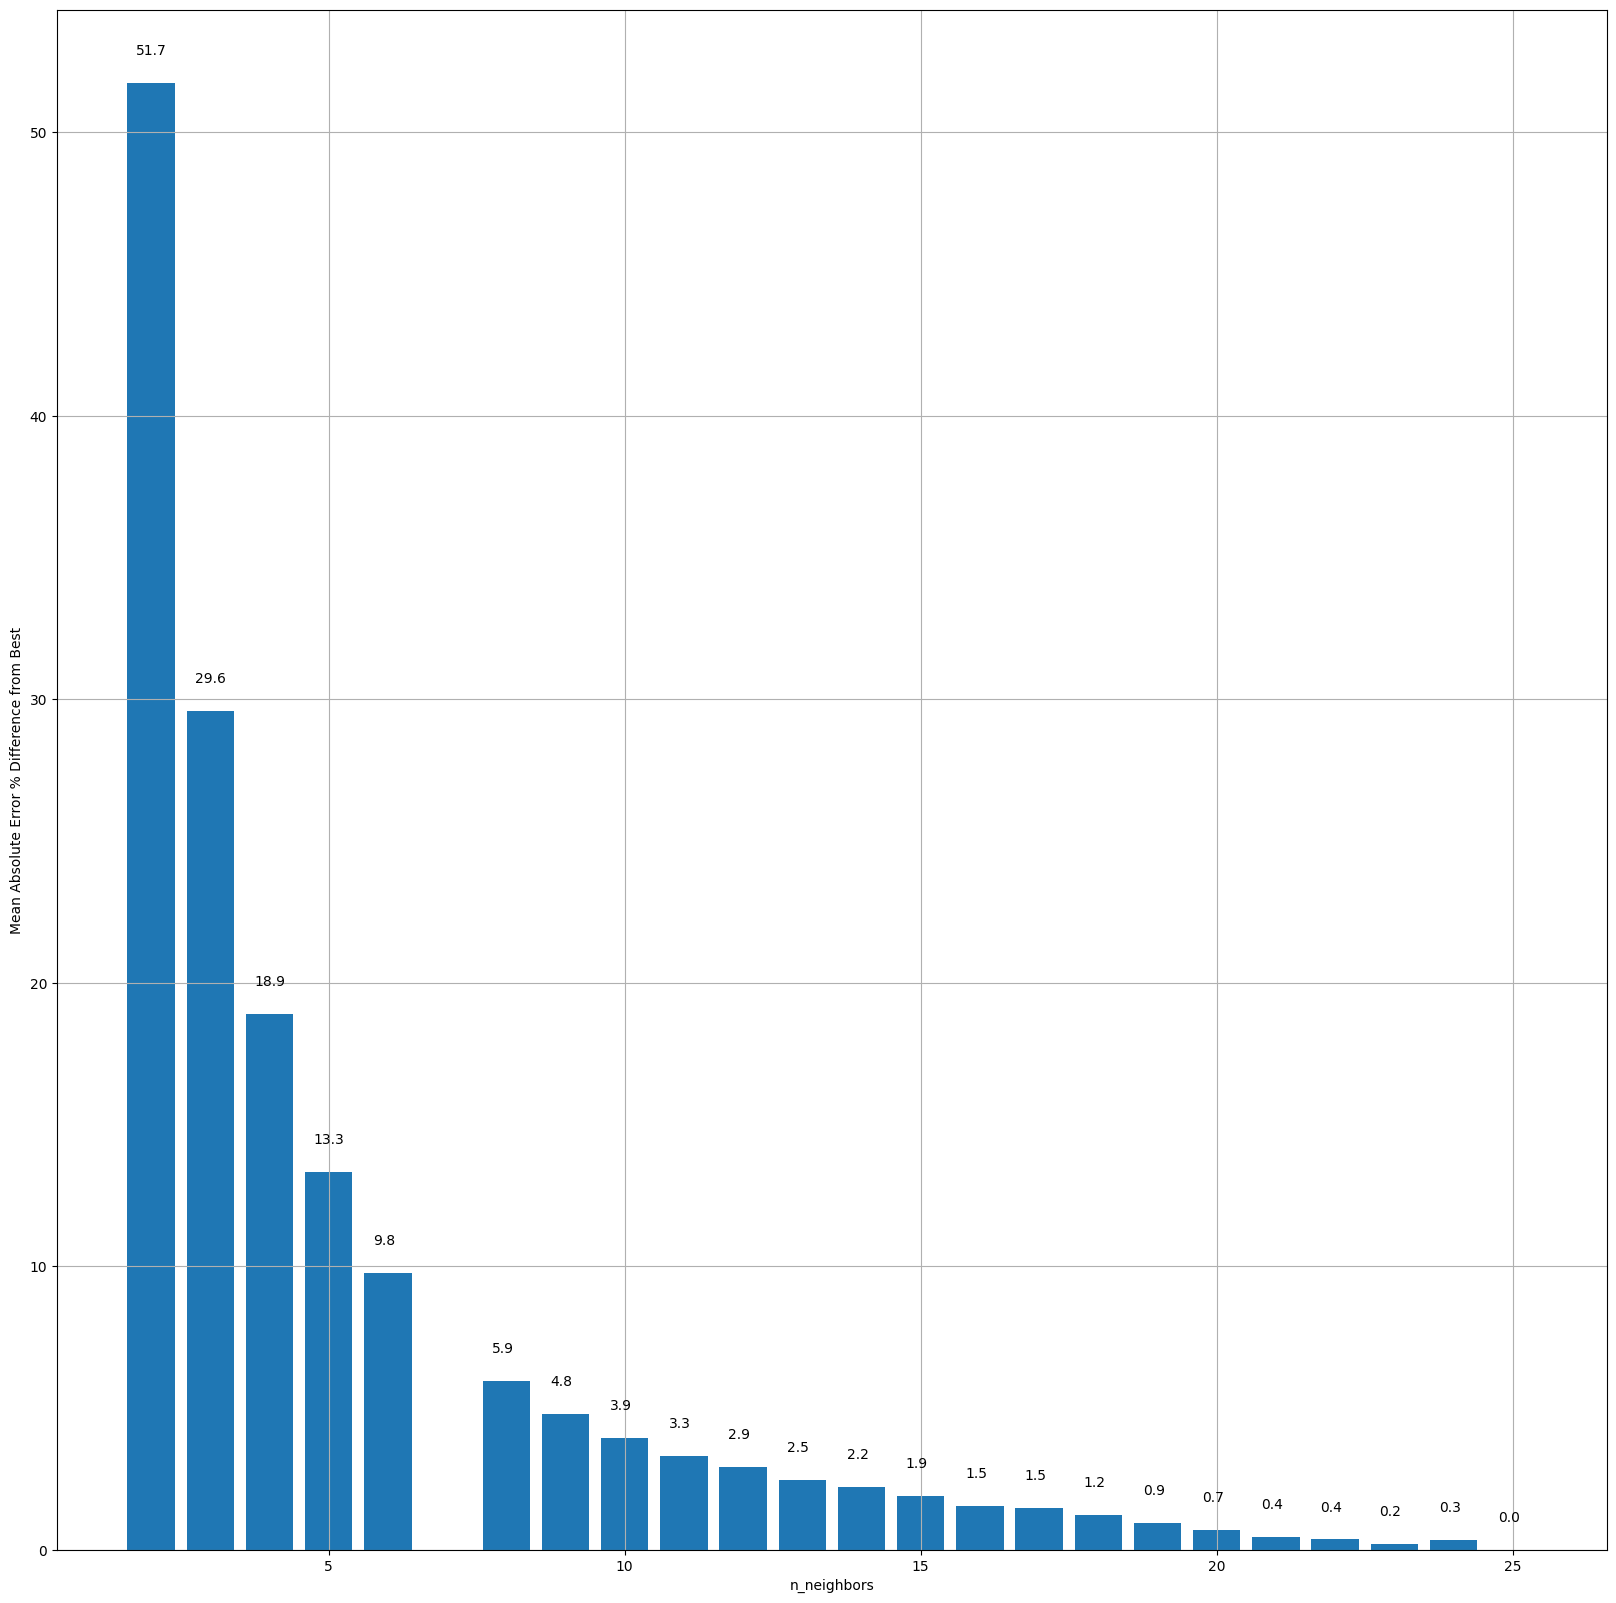

In [217]:
import matplotlib.pyplot as plt
import numpy as np

trial_list = trials.trials

# Extract the MAE scores from the trials
mae_scores = np.array([trial['result']['loss'] for trial in trial_list])

# Extract the n_neighbors values from the trials
n_neighbors_values = np.array([trial['misc']['vals']['n_neighbors'][0] for trial in trial_list])

# Get the unique n_neighbors values and their indices
unique_n_neighbors, indices = np.unique(n_neighbors_values, return_inverse=True)

# Calculate the average MAE score for each unique n_neighbors value
average_mae_scores = [mae_scores[indices == i].mean() for i in range(len(unique_n_neighbors))]

# Calculate the percentage difference of each MAE score from the best MAE score
best_score = min(average_mae_scores)
mae_scores_perc_diff = [100 * (x - best_score) / best_score for x in average_mae_scores]

# Plot
plt.bar(unique_n_neighbors, mae_scores_perc_diff)
# Show value over each bar centered above bar with 1% offset vertically
for i in range(len(unique_n_neighbors)):
    plt.text(x = unique_n_neighbors[i] - 0.25, y = mae_scores_perc_diff[i] + 1, s = round(mae_scores_perc_diff[i], 1))
plt.xlabel('n_neighbors')
plt.ylabel('Mean Absolute Error % Difference from Best')
plt.grid(True)
plt.show()


In [218]:
# Crea un modelo con los mejores hiperparámetros
model_knn= KNeighborsRegressor(n_neighbors=21,
                            weights='uniform',
                            p=1)

# Entrena el modelo
model_knn.fit(X_train_Modelling_SS, y_train_MC)

KNeighborsRegressor(n_neighbors=21, p=1)

## LightGBM

In [97]:
import lightgbm as lgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_absolute_error

space ={
    'max_depth': hp.quniform('max_depth', 2, 12, 1),
    'learning_rate': hp.uniform('learning_rate', 0.015, 0.07),
    'num_leaves': hp.quniform('num_leaves', 5, 100, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.01, 1.0),
    'subsample': hp.uniform('subsample', 0.01, 1.0),
    'n_estimators': hp.quniform('n_estimators', 20, 300, 5),
    'min_child_samples': hp.quniform('min_child_samples', 2, 100, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0)
}

# Función objetivo para hyperopt
def objective(space):
    model_LGBM = lgb.LGBMRegressor(max_depth = int(space['max_depth']),
                             learning_rate = space['learning_rate'],
                             num_leaves = int(space['num_leaves']),
                             n_estimators = int(space['n_estimators']),
                             colsample_bytree = space['colsample_bytree'],
                             subsample = space['subsample'],
                             min_child_samples = int(space['min_child_samples']),
                             reg_alpha = space['reg_alpha'],
                             reg_lambda = space['reg_lambda'])
    
                             
    mae = cross_val_score(model_LGBM, X_train_Modelling_MC, y_train, cv=5, scoring=make_scorer(mean_absolute_error)).mean()

    return {'loss': mae, 'status': STATUS_OK}


# Run the algorithm
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best: ", best)


100%|██████████| 50/50 [03:31<00:00,  4.22s/trial, best loss: 1.3038229358962736]
Best:  {'colsample_bytree': 0.5111508898439214, 'learning_rate': 0.0295359495640914, 'max_depth': 12.0, 'min_child_samples': 59.0, 'n_estimators': 280.0, 'num_leaves': 63.0, 'reg_alpha': 0.45253730686817173, 'reg_lambda': 0.5490217191401872, 'subsample': 0.5314092076643279}


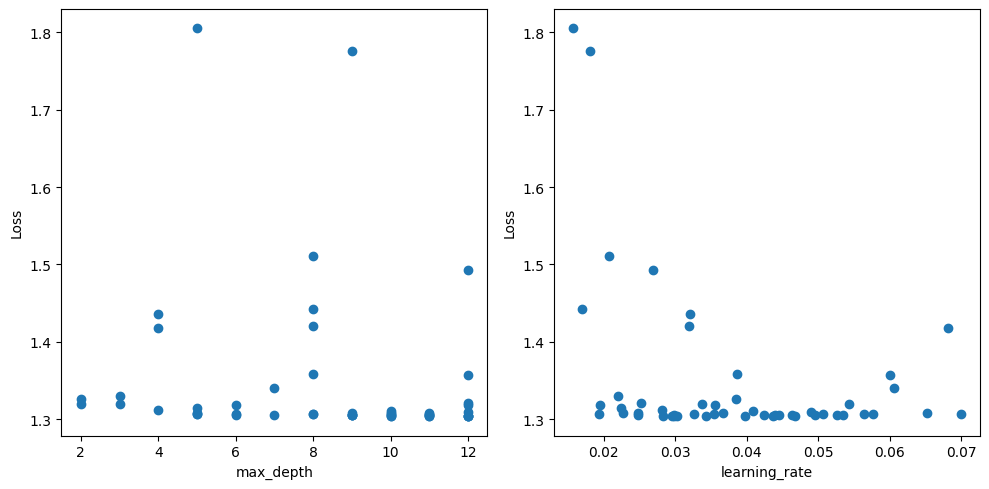

In [98]:
# Extrae los resultados
max_depth = [x['misc']['vals']['max_depth'] for x in trials.trials]
learning_rate = [x['misc']['vals']['learning_rate'] for x in trials.trials]
losses = [x['result']['loss'] for x in trials.trials]

# Grafica los resultados
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
plt.scatter(max_depth, losses)
plt.xlabel('max_depth')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.scatter(learning_rate, losses)
plt.xlabel('learning_rate')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


In [99]:
import lightgbm as lgb

# Creamos el modelo con los mejores hiperparámetros obtenidos
model_LGBM = lgb.LGBMRegressor(max_depth = int(best['max_depth']),
                          learning_rate = best['learning_rate'],
                          num_leaves = int(best['num_leaves']),
                          n_estimators = int(best['n_estimators']),
                          colsample_bytree = best['colsample_bytree'],
                          subsample = best['subsample'],
                          min_child_samples = int(best['min_child_samples']),
                          reg_alpha = best['reg_alpha'],
                          reg_lambda = best['reg_lambda'])


# Entrenamos el modelo con nuestros datos de entrenamiento
model_LGBM.fit(X_train_Modelling_MC, y_train)


LGBMRegressor(colsample_bytree=0.5111508898439214,
              learning_rate=0.0295359495640914, max_depth=12,
              min_child_samples=59, n_estimators=280, num_leaves=63,
              reg_alpha=0.45253730686817173, reg_lambda=0.5490217191401872,
              subsample=0.5314092076643279)

## Neural Network

In [100]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping


# asumiendo que X e y son tus datos y etiquetas respectivamente
# y que ya se encuentran preparados para entrenamiento

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_val, y_train, y_val = train_test_split(X_train_Modelling_MC, y_train_MC, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

early_stopping = EarlyStopping(monitor='val_loss', patience=10)


# Crear el modelo
model_NN = Sequential()
model_NN.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Capa de entrada
model_NN.add(Dense(16, activation='relu'))  # Capa oculta
model_NN.add(Dense(1, activation='linear'))  # Capa de salida

# Compilar el modelo
model_NN.compile(loss='mean_absolute_error', optimizer='adam')

# Entrenar el modelo
history = model_NN.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=64, callbacks=[early_stopping])

Epoch 1/100
843/843 [==============================] - 2s 2ms/step - loss: 2.0463 - val_loss: 1.2576
Epoch 2/100
843/843 [==============================] - 1s 1ms/step - loss: 1.2501 - val_loss: 1.2333
Epoch 3/100
843/843 [==============================] - 1s 1ms/step - loss: 1.2368 - val_loss: 1.2210
Epoch 4/100
843/843 [==============================] - 1s 1ms/step - loss: 1.2291 - val_loss: 1.2235
Epoch 5/100
843/843 [==============================] - 1s 1ms/step - loss: 1.2278 - val_loss: 1.2258
Epoch 6/100
843/843 [==============================] - 1s 1ms/step - loss: 1.2257 - val_loss: 1.2177
Epoch 7/100
843/843 [==============================] - 1s 1ms/step - loss: 1.2238 - val_loss: 1.2262
Epoch 8/100
843/843 [==============================] - 1s 1ms/step - loss: 1.2225 - val_loss: 1.2136
Epoch 9/100
843/843 [==============================] - 1s 1ms/step - loss: 1.2219 - val_loss: 1.2294
Epoch 10/100
843/843 [==============================] - 1s 1ms/step - loss: 1.2220 - val_lo

In [ ]:
# Evaluar el modelo
train_mae = model.evaluate(X_train, y_train, verbose=0)
val_mae = model.evaluate(X_val, y_val, verbose=0)

print(f"Train MAE: {train_mae}")
print(f"Validation MAE: {val_mae}")

Train MAE: 0.029811784625053406
Validation MAE: 0.02982877381145954


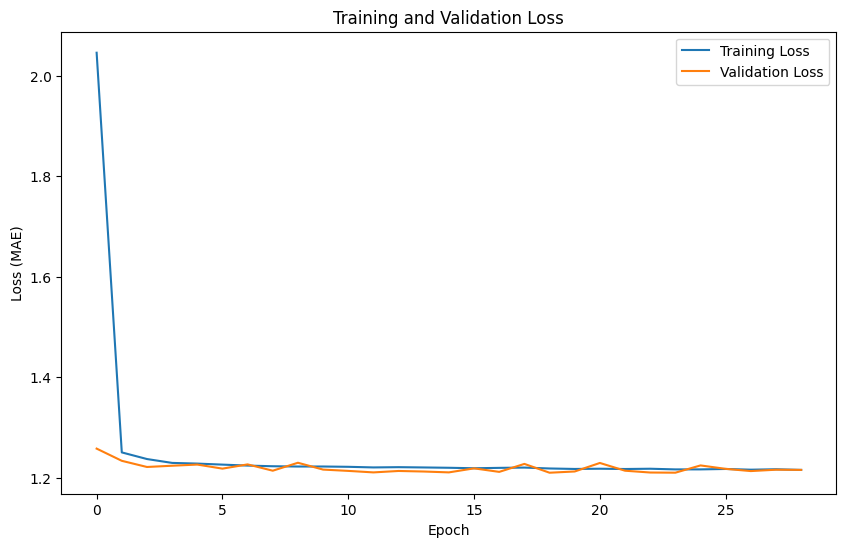

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.show()

In [152]:
X_train_Modelling_NN = scaler.transform(X_train_Modelling_MC)
model_NN.fit(X_train_Modelling_NN, y_train_MC, epochs=25, batch_size=64)

Epoch 1/25
1054/1054 [==============================] - 1s 1ms/step - loss: 1.2042
Epoch 2/25
1054/1054 [==============================] - 1s 1ms/step - loss: 1.2042
Epoch 3/25
1054/1054 [==============================] - 1s 1ms/step - loss: 1.2031
Epoch 4/25
1054/1054 [==============================] - 1s 1ms/step - loss: 1.2032
Epoch 5/25
1054/1054 [==============================] - 1s 1ms/step - loss: 1.2028
Epoch 6/25
1054/1054 [==============================] - 1s 1ms/step - loss: 1.2036
Epoch 7/25
1054/1054 [==============================] - 1s 1ms/step - loss: 1.2032
Epoch 8/25
1054/1054 [==============================] - 1s 1ms/step - loss: 1.2035
Epoch 9/25
1054/1054 [==============================] - 1s 1ms/step - loss: 1.2032
Epoch 10/25
1054/1054 [==============================] - 1s 1ms/step - loss: 1.2027
Epoch 11/25
1054/1054 [==============================] - 1s 1ms/step - loss: 1.2028
Epoch 12/25
1054/1054 [==============================] - 1s 1ms/step - loss: 1.2033
E

In [154]:
X_test.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876,0.313604,0.323347,0.363049,0.775045,0.262342,0.338582,0.142000,169.895615,0.431193,0.216816,0.292944
std,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650,0.463962,0.467759,0.480884,0.030844,0.030866,0.039394,0.078692,29.882239,0.078422,0.031132,0.041271
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.084507,0.051643,0.046948
25%,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930,0.000000,0.000000,0.000000,0.758929,0.245455,0.317460,0.080160,155.302527,0.397974,0.198827,0.267559
50%,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627,0.000000,0.000000,0.000000,0.776596,0.261538,0.337079,0.143090,167.005385,0.432040,0.215712,0.288873
75%,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063,1.000000,1.000000,1.000000,0.792308,0.278261,0.357143,0.198190,180.301513,0.463221,0.233428,0.314233
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,1.000000,1.000000,1.000000,2.027027,2.483516,3.183099,0.876268,2297.005110,5.537313,2.146974,2.567766


In [155]:
# Inf values to 0
X_test = X_test.replace([np.inf, -np.inf], 0)

In [116]:
X_test_NN = scaler.fit_transform(X_test)

In [117]:
y_pred = model_NN.predict(X_test_NN)

1543/1543 [==============================] - 2s 916us/step


## SVR

X_train_Modelling_SVR = scaler.fit_transform(X_train_Modelling_MC)

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, make_scorer

space = {
    'C': hp.quniform('C', 1, 10, 1),   # Rango más pequeño y pasos más pequeños para el parámetro C
    'epsilon': hp.quniform('epsilon', 0.1, 0.3, 0.05),  # Rango más pequeño y pasos más pequeños para el parámetro epsilon
    'kernel': hp.choice('kernel', ['linear']),  # Mantener el kernel lineal
}


# Función objetivo para Hyperopt
def objective(params):
    model_SVR = SVR(**params)
    score = cross_val_score(model_SVR, X_train_Modelling_SVR, y_train_MC, cv=5, scoring=make_scorer(mean_absolute_error)).mean()
    
    for trial in trials.trials:
        print("Loss:", trial['result']['loss'])
        print("Parameters:", trial['misc']['vals'])
        print("------")
    
    return {'loss': score, 'status': STATUS_OK}

# Inicializar Trials para guardar la información de la optimización
trials = Trials()

# Correr la optimización
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=20, trials=trials)


print("Best: ", best_params)


print(X_train_Modelling_MC.shape)
print(y_train_MC.shape)

# Traducir el parámetro 'kernel' de índice a cadena


# Entrenar el modelo con los mejores hiperparámetros
model_SVR = SVR(**best_params)
model_SVR.fit(X_train_Modelling_SVR, y_train_SVR)

print("Mejores hiperparámetros encontrados: ", best_params)

## XGBoost

In [232]:
X_train_Modelling_MC.shape

(67429, 18)

In [233]:
y_train_MC.shape

(53943,)

In [260]:
X_train_Modelling.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
0,0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0,1,0,0.770492,0.245902,0.319149,0.175917,164.698140,0.439335,0.229452,0.288160
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0,1,0,0.750000,0.250000,0.333333,0.065335,159.461114,0.434014,0.223129,0.326531
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,0,1,0.801802,0.270270,0.337079,0.151542,163.502324,0.457666,0.224256,0.268879
4,4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0,1,0,0.810000,0.270000,0.333333,0.111827,208.259837,0.514303,0.193548,0.255630
5,5,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,10,0,0,1,0.783333,0.275000,0.351064,0.190336,151.550759,0.464865,0.235381,0.275184


In [263]:
X_train_Modelling_MC = X_train_Modelling.drop(['Age', 'id'], axis=1)

In [280]:
import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Definir el espacio de búsqueda de hiperparámetros
params = {
    'max_depth': hp.choice('max_depth', range(2, 7)),
    'learning_rate': hp.quniform('learning_rate', 0.01, 0.1, 0.01),
    'subsample': hp.quniform('subsample', 0.5, 0.8, 0.1),
    'gamma': hp.quniform('gamma', 0, 5, 0.5),
    'min_child_weight': hp.quniform('min_child_weight', 5, 15, 1),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.1),
    'reg_alpha': hp.quniform('reg_alpha', 0.5, 1, 0.1),
    'reg_lambda': hp.quniform('reg_lambda', 1, 10, 0.5)
}

# Dividir los datos de entrenamiento en un conjunto de entrenamiento y validación
X_train_MC, X_val, y_train_MC, y_val = train_test_split(X_train_Modelling_MC, y_train, test_size=0.3, random_state=42)

# Convertir los datos de entrenamiento y validación en objetos DMatrix
dtrain = xgb.DMatrix(X_train_MC, label=y_train_MC)
dvalid = xgb.DMatrix(X_val, label=y_val)

# Función objetivo para Hyperopt
def objective(params):
    params['max_depth'] = int(params['max_depth'])
   
    # Ajustar el modelo usando la función 'train' en lugar de la función 'fit'
    # Esto es necesario para usar la función de early stopping
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=5000,
        evals=[(dvalid, 'eval')],
        early_stopping_rounds=10,
        verbose_eval=100
    )

    y_pred = model.predict(dvalid)
    mae = mean_absolute_error(y_val, y_pred)

    return {'loss': mae, 'status': STATUS_OK}


# Ejecutar la optimización de hiperparámetros
trials = Trials()
best = fmin(
    fn=objective,
    space=params,
    algo=tpe.suggest,
    max_evals=20,
    trials=trials
)



[0]	eval-rmse:8.86489                                 
[100]	eval-rmse:1.66467                               
[105]	eval-rmse:1.66468                               
[0]	eval-rmse:8.86480                                                          
[95]	eval-rmse:1.66216                                                         
[0]	eval-rmse:9.42057                                                           
[100]	eval-rmse:2.09917                                                         
[200]	eval-rmse:1.67987                                                         
[300]	eval-rmse:1.66616                                                         
[400]	eval-rmse:1.66420                                                         
[464]	eval-rmse:1.66372                                                         
[0]	eval-rmse:8.86898                                                           
[100]	eval-rmse:1.67459                                                         
[164]	eval-rmse:1.67199    

In [281]:
print("Best: ", best)

Best:  {'colsample_bytree': 0.9, 'gamma': 4.0, 'learning_rate': 0.04, 'max_depth': 3, 'min_child_weight': 8.0, 'reg_alpha': 0.7000000000000001, 'reg_lambda': 3.0, 'subsample': 0.6000000000000001}


In [ ]:
Best:  {'colsample_bytree': 0.5, 'gamma': 8.0, 'learning_rate': 0.16, 'max_depth': 8.0, 'min_child_weight': 6.0, 'n_estimators': 25.0, 'reg_alpha': 0.9, 'reg_lambda': 2.25, 'subsample': 0.7000000000000001}


In [139]:
best_XGB = {
        'colsample_bytree': 0.8, 
        'gamma': 5.0, 
        'learning_rate': 0.04, 
        'max_depth': 3.0, 
        'min_child_weight': 6.0, 
        'n_estimators': 275.0, 
        'reg_alpha': 0.5, 
        'reg_lambda': 3.5, 
        'subsample': 0.8
        }

In [141]:
# Entrenar el modelo con los mejores hiperparámetros
model_XGB = xgb.XGBRegressor(
    n_estimators=int(best_XGB['n_estimators']),
    max_depth=int(best_XGB['max_depth']),
    learning_rate=best_XGB['learning_rate'],
    subsample=best_XGB['subsample'],
    gamma=best_XGB['gamma'],
    min_child_weight=best_XGB['min_child_weight'],
    colsample_bytree=best_XGB['colsample_bytree'],
    reg_alpha=best_XGB['reg_alpha'],
    reg_lambda=best_XGB['reg_lambda'],
    random_state=42
)
model_XGB.fit(X_train_Modelling_MC, y_train_MC)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=5.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=6.0, missing=nan, monotone_constraints=None,
             n_estimators=275, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [138]:
y_pred = model_XGB.predict(X_test)

## XGBoost with feature selection   

In [33]:
X_train_Modelling_MC.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,0,1,0,0.770492,0.245902,0.319149,0.175917,164.698140,0.439335,0.229452,0.288160
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0,1,0,0.750000,0.250000,0.333333,0.065335,159.461114,0.434014,0.223129,0.326531
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,0,0,1,0.801802,0.270270,0.337079,0.151542,163.502324,0.457666,0.224256,0.268879
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0,1,0,0.810000,0.270000,0.333333,0.111827,208.259837,0.514303,0.193548,0.255630
5,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,0,0,1,0.783333,0.275000,0.351064,0.190336,151.550759,0.464865,0.235381,0.275184


In [36]:
X_train_Modelling_FS = X_train_Modelling_MC[['Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Sex_F', 'Sex_I', 'Sex_M']]

In [37]:
X_train_Modelling_FS.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,0,0,1
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0,1,0
5,1.5000,1.1750,0.4125,28.845616,13.409313,6.789705,7.937860,0,0,1


In [41]:
import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Definir el espacio de búsqueda de hiperparámetros
params = {
    'max_depth': hp.choice('max_depth', range(4, 10)),
    'learning_rate': hp.quniform('learning_rate', 0.001, 0.005, 0.001),
    'subsample': hp.quniform('subsample', 0.5, 0.8, 0.1),
    'gamma': hp.quniform('gamma', 0, 1, 0.1),
    'min_child_weight': hp.quniform('min_child_weight', 10, 25, 1),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.1),
}

# Dividir los datos de entrenamiento en un conjunto de entrenamiento y validación
X_train_MC, X_val, y_train_MC, y_val = train_test_split(X_train_Modelling_FS, y_train, test_size=0.3, random_state=42)

# Convertir los datos de entrenamiento y validación en objetos DMatrix
dtrain = xgb.DMatrix(X_train_MC, label=y_train_MC)
dvalid = xgb.DMatrix(X_val, label=y_val)

# Función objetivo para Hyperopt
def objective(params):
    params['max_depth'] = int(params['max_depth'])
   
    # Ajustar el modelo usando la función 'train' en lugar de la función 'fit'
    # Esto es necesario para usar la función de early stopping
    model = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=1000,
        evals=[(dvalid, 'eval')],
        early_stopping_rounds=30,
        verbose_eval=100
    )

    y_pred = model.predict(dvalid)
    mae = mean_absolute_error(y_val, y_pred)

    return {'loss': mae, 'status': STATUS_OK}


# Ejecutar la optimización de hiperparámetros
trials = Trials()
best = fmin(
    fn=objective,
    space=params,
    algo=tpe.suggest,
    max_evals=20,
    trials=trials
)



[0]	eval-rmse:9.55948                                 
[100]	eval-rmse:5.95743                               
[200]	eval-rmse:3.85750                               
[300]	eval-rmse:2.69455                               
[400]	eval-rmse:2.10593                               
[500]	eval-rmse:1.83881                               
[600]	eval-rmse:1.72894                               
[700]	eval-rmse:1.68523                               
[800]	eval-rmse:1.66841                               
[900]	eval-rmse:1.66157                               
[999]	eval-rmse:1.65895                               
[0]	eval-rmse:9.58736                                                          
[100]	eval-rmse:7.91869                                                        
[200]	eval-rmse:6.56450                                                        
[300]	eval-rmse:5.46886                                                        
[400]	eval-rmse:4.58883                                                    

KeyboardInterrupt: 

In [142]:
print("Best: ", best_XGB)

Best:  {'colsample_bytree': 0.8, 'gamma': 5.0, 'learning_rate': 0.04, 'max_depth': 3.0, 'min_child_weight': 6.0, 'n_estimators': 275.0, 'reg_alpha': 0.5, 'reg_lambda': 3.5, 'subsample': 0.8}


In [143]:
# Entrenar el modelo con los mejores hiperparámetros
model_XGB = xgb.XGBRegressor(
    n_estimators=int(best_XGB['n_estimators']),
    max_depth=int(best_XGB['max_depth']),
    learning_rate=best_XGB['learning_rate'],
    subsample=best_XGB['subsample'],
    gamma=best_XGB['gamma'],
    min_child_weight=best_XGB['min_child_weight'],
    colsample_bytree=best_XGB['colsample_bytree'],
    reg_alpha=best_XGB['reg_alpha'],
    reg_lambda=best_XGB['reg_lambda'],
    random_state=42
)
model_XGB.fit(X_train_Modelling_FS, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=5.0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.04, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=6.0, missing=nan, monotone_constraints=None,
             n_estimators=275, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [146]:
y_pred = model_XGB.predict(X_test[['Shell Weight', 'Sex_I', 'Volume', 'Ratio_ShuWei']])

# Stacking

In [140]:
X_train_Stack = scaler.transform(X_train_Modelling_MC)

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import mean_absolute_error, make_scorer    


linear_regression = XGBRegressor()

# Construir el modelo de Stacking
stacking_regressor = StackingCVRegressor(regressors=[model_knn, model_RF, model_LGBM, model_XGB, model_Lasso],
                                         meta_regressor=linear_regression,
                                         random_state=42,
                                         use_features_in_secondary=True)

# Entrenar todos los modelos
for clf in [model_knn, model_RF, model_LGBM, model_XGB, model_Lasso, stacking_regressor]:
    scores = cross_val_score(clf, X_train_Stack, y_train_MC, cv=5, scoring=make_scorer(mean_absolute_error))
    print(f"{clf.__class__.__name__}: {scores.mean()} ± {scores.std()}")


KNeighborsRegressor: 1.2764000462226965 ± 0.0
[LightGBM] [Warning] feature_fraction is set=0.5935125266901218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5935125266901218
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_fraction is set=0.06711447241587068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.06711447241587068
[LightGBM] [Warning] feature_fraction is set=0.5935125266901218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5935125266901218
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_fraction is set=0.06711447241587068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.06711447241587068
[LightGBM] [Warning] feature_fraction is set=0.5935125266901218, colsample_bytree=1.0 will be ignored. C

In [163]:
X_test.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876,0.313604,0.323347,0.363049,0.775045,0.262342,0.338582,0.142000,169.895615,0.431193,0.216816,0.292944
std,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650,0.463962,0.467759,0.480884,0.030844,0.030866,0.039394,0.078692,29.882239,0.078422,0.031132,0.041271
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.084507,0.051643,0.046948
25%,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930,0.000000,0.000000,0.000000,0.758929,0.245455,0.317460,0.080160,155.302527,0.397974,0.198827,0.267559
50%,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627,0.000000,0.000000,0.000000,0.776596,0.261538,0.337079,0.143090,167.005385,0.432040,0.215712,0.288873
75%,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063,1.000000,1.000000,1.000000,0.792308,0.278261,0.357143,0.198190,180.301513,0.463221,0.233428,0.314233
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,1.000000,1.000000,1.000000,2.027027,2.483516,3.183099,0.876268,2297.005110,5.537313,2.146974,2.567766


In [166]:
X_test.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876,0.313604,0.323347,0.363049,0.775045,0.262342,0.338582,0.142000,169.895615,0.431193,0.216816,0.292944
std,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650,0.463962,0.467759,0.480884,0.030844,0.030866,0.039394,0.078692,29.882239,0.078422,0.031132,0.041271
min,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.084507,0.051643,0.046948
25%,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930,0.000000,0.000000,0.000000,0.758929,0.245455,0.317460,0.080160,155.302527,0.397974,0.198827,0.267559
50%,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627,0.000000,0.000000,0.000000,0.776596,0.261538,0.337079,0.143090,167.005385,0.432040,0.215712,0.288873
75%,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063,1.000000,1.000000,1.000000,0.792308,0.278261,0.357143,0.198190,180.301513,0.463221,0.233428,0.314233
max,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,1.000000,1.000000,1.000000,2.027027,2.483516,3.183099,0.876268,2297.005110,5.537313,2.146974,2.567766


In [167]:
X_train_Modelling_MC.describe()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_F,Sex_I,Sex_M,Relation_DL,Relation_HL,Relation_HD,Volume,Density,Ratio_ShuWei,Ratio_VisWei,Ratio_SheWei
count,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000,67429.000000
mean,1.326047,1.031066,0.348965,22.977382,9.980035,4.981683,6.589098,0.310163,0.319506,0.370330,0.775726,0.261972,0.337789,0.139007,168.640412,0.433930,0.216921,0.291896
std,0.248569,0.206025,0.079508,11.240448,5.036580,2.506184,3.145124,0.462564,0.466289,0.482897,0.027491,0.025315,0.031277,0.070580,19.865879,0.073034,0.027752,0.037755
min,0.600000,0.500000,0.150000,1.105630,0.666213,0.226796,0.311845,0.000000,0.000000,0.000000,0.373239,0.119718,0.187500,0.012026,52.564923,0.193277,0.076023,0.122155
25%,1.175000,0.900000,0.300000,13.806207,5.910871,2.934173,4.110678,0.000000,0.000000,0.000000,0.759615,0.245455,0.317073,0.082405,155.541209,0.402398,0.199667,0.267677
50%,1.375000,1.075000,0.362500,23.515910,9.865626,4.918638,6.803880,0.000000,0.000000,0.000000,0.776699,0.260870,0.336735,0.140365,166.885461,0.434211,0.216086,0.288387
75%,1.525000,1.187500,0.412500,31.623867,13.877080,6.903103,8.930093,1.000000,1.000000,1.000000,0.792000,0.277311,0.355769,0.192623,179.573723,0.464228,0.233372,0.312862
max,1.937500,1.500000,0.562500,54.062497,23.331639,11.538246,14.897662,1.000000,1.000000,1.000000,1.000000,0.453608,0.602740,0.386862,384.085574,4.725118,0.665399,2.615672


In [168]:
stacking_regressor.fit(X_train_Modelling_MC, y_train_MC)
y_pred = stacking_regressor.predict(X_test)  

[LightGBM] [Warning] feature_fraction is set=0.5935125266901218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5935125266901218
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_fraction is set=0.06711447241587068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.06711447241587068
[LightGBM] [Warning] feature_fraction is set=0.5935125266901218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5935125266901218
[LightGBM] [Warning] min_data_in_leaf is set=99, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=99
[LightGBM] [Warning] bagging_fraction is set=0.06711447241587068, subsample=1.0 will be ignored. Current value: bagging_fraction=0.06711447241587068
[LightGBM] [Warning] feature_fraction is set=0.5935125266901218, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5935125266901

c:\Users\Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(
c:\Users\Jose\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [100]:
y_pred = model_LGBM.predict(X_test)

In [101]:
# Submission to a file
# Rounded pred increases the score
submission = pd.DataFrame({'id': id_test, 'Age': np.round(y_pred,0)})
submission.to_csv('submission.csv', index=False)
